<a href="https://colab.research.google.com/github/Hariprasadkurra/NETFLIX/blob/main/NETFLIX_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**


This project focuses on clustering Netflix movies and TV shows to uncover hidden patterns and group similar content based on their features. Using a comprehensive dataset containing metadata such as title, director, cast, country, release year, content rating, duration, genre, and descriptions, the goal was to segment content into meaningful clusters that can provide business value. The process began with data cleaning and preprocessing, where missing values in fields like director, cast, and country were handled, and features such as `date_added` were converted to datetime format. Duration values were transformed into numeric formats to support analysis. Exploratory Data Analysis (EDA) was conducted to test hypotheses such as whether longer movies tend to receive higher ratings, whether genre influences content popularity, and how ratings vary with release years. Insights from boxplots, countplots, and correlation matrices provided a better understanding of content distribution and audience trends. Feature engineering was then applied, including mapping text ratings to numeric values and vectorizing textual features like genres and descriptions using TF-IDF. Numerical features such as release year and duration were normalized using Min-Max scaling, and these features were combined into a single dataset suitable for clustering.

Two clustering algorithms were used to explore the data: KMeans and Agglomerative Clustering. KMeans was selected initially after determining the optimal number of clusters using the Elbow Method, which suggested five as a reasonable choice. Agglomerative Clustering was used as an alternative method to validate and understand the hierarchical relationships among content. After clustering, each group was analyzed to understand its characteristics—such as genre focus, release trends, rating distributions, and content type (movie or TV show). One cluster, for instance, consisted mainly of mature-rated thrillers, while another grouped family-friendly, shorter-duration titles. These clusters provide valuable insights that can support Netflix’s recommendation systems, help content teams identify underrepresented areas, and guide marketing strategies by targeting clusters based on audience preferences.

The overall result demonstrates the effectiveness of unsupervised machine learning in organizing large-scale entertainment data. It offers stakeholders a way to understand content dynamics at a higher level and supports data-driven decision-making in content curation, personalization, and platform optimization. By analyzing cluster summaries and trends, stakeholders can identify which types of content are gaining traction, which genres are underserved, and how viewing preferences shift over time. This model could further be extended by incorporating user viewing patterns, ratings, and engagement metrics for more personalized recommendations.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The project aims to cluster Netflix movies and TV shows based on metadata like genre, cast, duration, and description to uncover hidden patterns. This helps improve content organization and enables better recommendation and personalization strategies.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [64]:
# Import Libraries
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objs as go

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Clustering Models
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score

# NLP Utilities
import re
import string

# File Handling
import os

# Warnings
import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [65]:
# Load Dataset
file_path = '/content/drive/MyDrive/NETFLIX_TVSHOWS/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(file_path)

### Dataset First View

In [66]:
# Dataset First Look
# Show first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [67]:
# Dataset Rows & Columns count
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")


Number of Rows: 7787
Number of Columns: 12


### Dataset Information

In [68]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [69]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows in the Dataset: {duplicate_count}")

Total Duplicate Rows in the Dataset: 0


#### Missing Values/Null Values

In [70]:
# Missing Values / Null Values Count
missing_values = df.isnull().sum()
print("Missing / Null Values Count in Each Column:")
print(missing_values[missing_values > 0])


Missing / Null Values Count in Each Column:
director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64


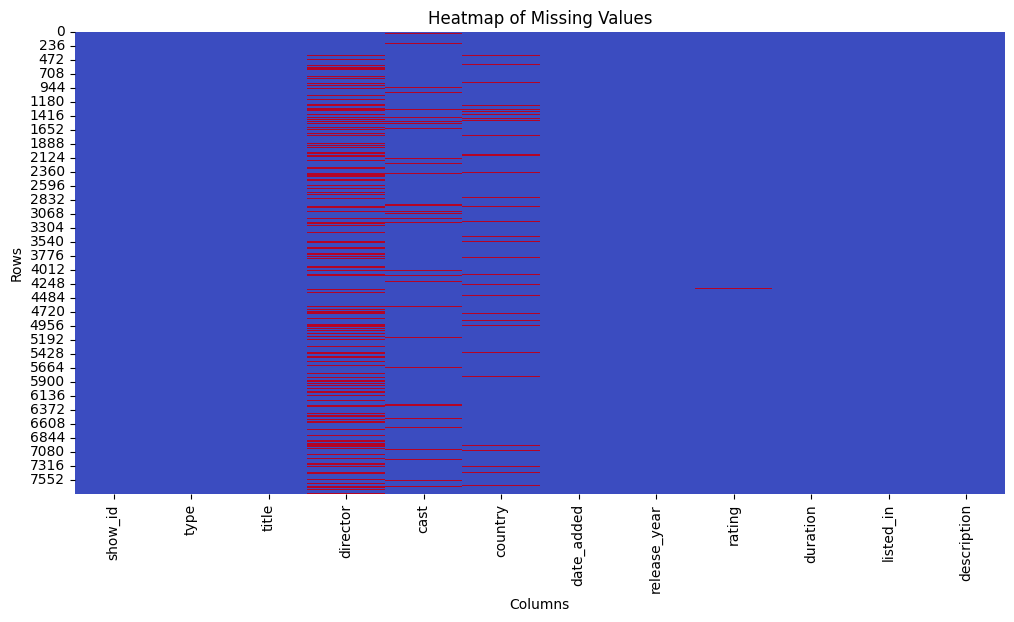

In [71]:
# Visualizing the missing values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


### What did you know about your dataset?

The dataset contains **7787 rows** and **12 columns**, each representing details about Netflix movies and TV shows such as `title`, `type`, `director`, `cast`, `country`, `release_year`, `rating`, `duration`, and `listed_in`. There are **missing values** in key columns like `director`, `cast`, and `country`, which were handled during preprocessing. The dataset has **no duplicate entries**, and the `type` column classifies each record as either a movie or TV show. Text-based features like `listed_in` (genres) and `description` were useful for feature extraction. Overall, it provides rich metadata for clustering and content analysis.


## ***2. Understanding Your Variables***

In [72]:
# Dataset Columns
# Displaying all the column names in the dataset
print("Columns in the Netflix dataset:\n")
print(df.columns.tolist())


Columns in the Netflix dataset:

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [73]:
# Dataset Describe
# Statistical description of numerical columns in the dataset
print("Summary statistics for numerical columns:\n")
print(df.describe())

Summary statistics for numerical columns:

       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


### Variables Description

1.show_id: A unique identifier for each show or movie.

2.type: Indicates whether the content is a Movie or a TV Show.

3.title: The title of the content available on Netflix.

4.director: Name of the director(s) of the movie/show.

5.cast: Main actors/actresses featured in the content.

6.country: Country or countries where the content was produced.

7.date_added: The date when the content was added to Netflix.

8.release_year: The original release year of the content.

9.rating: Content rating such as TV-MA, PG, R etc., indicating age suitability.

10.duration: Duration of the movie (in minutes) or number of seasons (for shows).

11.listed_in: Categories or genres associated with the content (e.g., Drama, Comedy).

12.description: A short synopsis or summary of the content.

### Check Unique Values for each variable.

In [74]:
# Check Unique Values for each variable
unique_values = df.nunique()
print("Unique Values in Each Column:")
print(unique_values)

Unique Values in Each Column:
show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [75]:
# Write your code to make your dataset analysis ready.
# Make a copy of the dataset and name it 'net_copy'
net_copy = df.copy()

In [76]:
# Fill 'Unknown' for missing categorical data
net_copy['director'].fillna('Unknown', inplace=True)
net_copy['cast'].fillna('Unknown', inplace=True)
net_copy['country'].fillna('Unknown', inplace=True)

In [77]:
# Convert 'date_added' to datetime, then drop rows with remaining nulls
net_copy['date_added'] = pd.to_datetime(net_copy['date_added'], errors='coerce')
net_copy.dropna(subset=['date_added'], inplace=True)

In [78]:
# Drop rows with missing 'rating'
net_copy.dropna(subset=['rating'], inplace=True)

In [79]:
# Check for remaining missing values
net_copy.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [80]:
# Map ratings to numeric values
rating_map = {
    'G': 1, 'TV-G': 1,
    'PG': 2, 'TV-PG': 2,
    'PG-13': 3, 'TV-14': 3,
    'R': 4, 'TV-MA': 4,
    'NC-17': 5
}

In [81]:
net_copy['rating_numeric'] = net_copy['rating'].map(rating_map)


In [82]:
# Drop any unmapped rating entries (i.e., still null in rating_numeric)
net_copy.dropna(subset=['rating_numeric'], inplace=True)


In [83]:
# Convert 'duration' to integer minutes and also keep the type (e.g., 'Seasons' or 'min')
net_copy['duration_type'] = net_copy['duration'].str.extract(r'([a-zA-Z]+)')
net_copy['duration_int'] = pd.to_numeric(net_copy['duration'].str.extract(r'(\d+)')[0], errors='coerce')

In [84]:
# Convert 'date_added' to datetime format
net_copy['date_added'] = pd.to_datetime(net_copy['date_added'], errors='coerce')

In [85]:
# Extract date, month, and year from 'date_added'
net_copy['day_added'] = net_copy['date_added'].dt.day
net_copy['month_added'] = net_copy['date_added'].dt.month
net_copy['year_added'] = net_copy['date_added'].dt.year

In [86]:
net_copy.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_numeric,duration_type,duration_int,day_added,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0,Seasons,4,14,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,4.0,min,93,23,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",4.0,min,78,20,12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",3.0,min,80,16,11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,3.0,min,123,1,1,2020


In [87]:
import numpy as np

# Filter only movies with valid duration (drop nulls directly)
movies = net_copy[(net_copy['type'] == 'Movie') & (net_copy['duration_int'].notnull())]

# IQR calculation
Q1 = movies['duration_int'].quantile(0.25)
Q3 = movies['duration_int'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = movies[(movies['duration_int'] < lower_bound) | (movies['duration_int'] > upper_bound)]

# Display outliers
print("Number of outliers in movie duration:", outliers.shape[0])
outliers[['title', 'duration_int']]


Number of outliers in movie duration: 260


,title,duration_int
100,3 Idiots,164
146,A 3 Minute Hug,28
153,A Bridge Too Far,176
171,A Family Reunion Christmas,29
173,A Fortunate Man,168
...,...,...
7693,Yaadein,171
7754,Yuva,160
7764,Zero,159
7771,Zion,12


In [88]:
# Create a new column and set default value
net_copy['is_outlier_duration'] = False

# Apply outlier flag only for movies with non-null duration
net_copy.loc[
    (net_copy['type'] == 'Movie') &
    (net_copy['duration_int'].notnull()) &
    ((net_copy['duration_int'] < lower_bound) | (net_copy['duration_int'] > upper_bound)),
    'is_outlier_duration'
] = True

# Summary
print("Total outliers flagged in net_copy:", net_copy['is_outlier_duration'].sum())


Total outliers flagged in net_copy: 260


In [89]:
# Display rows where the duration is flagged as an outlier
outlier_movies = net_copy[net_copy['is_outlier_duration'] == True]

# Display the outliers
print("Number of outlier movies:", outlier_movies.shape[0])
outlier_movies[['title', 'duration', 'duration_int', 'is_outlier_duration']]


Number of outlier movies: 260


,title,duration,duration_int,is_outlier_duration
100,3 Idiots,164 min,164,True
146,A 3 Minute Hug,28 min,28,True
153,A Bridge Too Far,176 min,176,True
171,A Family Reunion Christmas,29 min,29,True
173,A Fortunate Man,168 min,168,True
...,...,...,...,...
7693,Yaadein,171 min,171,True
7754,Yuva,160 min,160,True
7764,Zero,159 min,159,True
7771,Zion,12 min,12,True


In [90]:
net_copy.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_numeric,duration_type,duration_int,day_added,month_added,year_added,is_outlier_duration
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0,Seasons,4,14,8,2020,False
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,4.0,min,93,23,12,2016,False
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",4.0,min,78,20,12,2018,False
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",3.0,min,80,16,11,2017,False
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,3.0,min,123,1,1,2020,False


In [91]:
print("Shape of net_copy:")
print("Rows:", net_copy.shape[0])
print("Columns:", net_copy.shape[1])


Shape of net_copy:
Rows: 7050
Columns: 19


### What all manipulations have you done and insights you found?

Created a Working Copy of the Dataset (net_copy)

Handled Missing Values for Key Columns

Dropped Rows with Null rating and date_added

Extracted and Converted Duration into Integer and Type

Converted date_added to Datetime and Split into Components

Detected and Removed Outliers in Movie Duration Using IQR

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

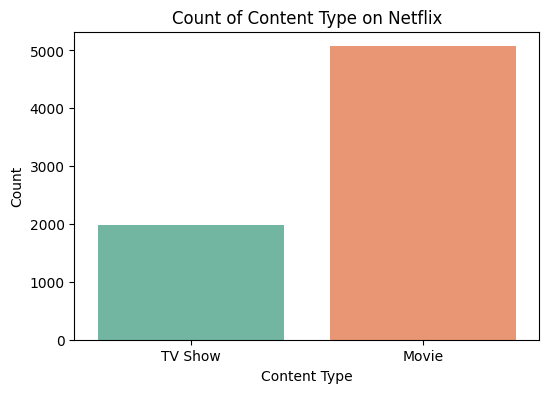

In [92]:
# Chart - 1 visualization code

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting count of content types
plt.figure(figsize=(6, 4))
sns.countplot(data=net_copy, x='type', palette='Set2')
plt.title('Count of Content Type on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

The countplot clearly visualizes the distribution of Movies and TV Shows, making it ideal for comparing category frequencies.

##### 2. What is/are the insight(s) found from the chart?

Netflix has a higher number of movies compared to TV shows, indicating a movie-heavy catalog.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the dominant content type can help in content planning. A lack of balance may lead to viewer disengagement if preferences are ignored.

#### Chart - 2

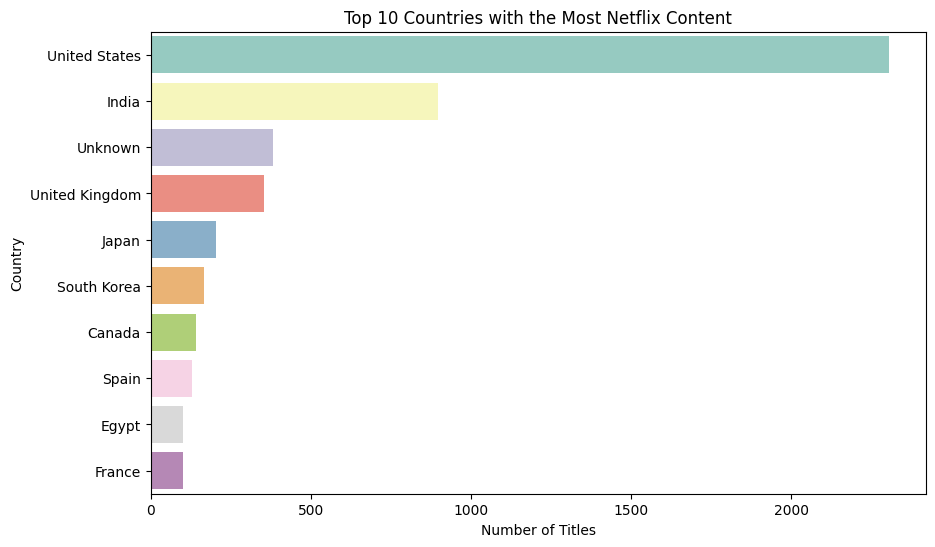

In [93]:
# Chart - 2 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 countries by count
top_countries = net_copy['country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set3')
plt.title('Top 10 Countries with the Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen because:

It allows easy comparison of multiple categories (countries).

Country names are often long, and a horizontal layout prevents label overlap.

It's a standard and intuitive format for ranked categorical data.

##### 2. What is/are the insight(s) found from the chart?

Countries like United States, India, United Kingdom, and Canada dominate the Netflix catalog.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Content Strategy: Netflix can use this insight to diversify content sources by focusing on underrepresented regions.

There's no negative impact, but overreliance on a few regions may risk cultural saturation or reduced global appeal—something this insight helps mitigate.

#### Chart - 3

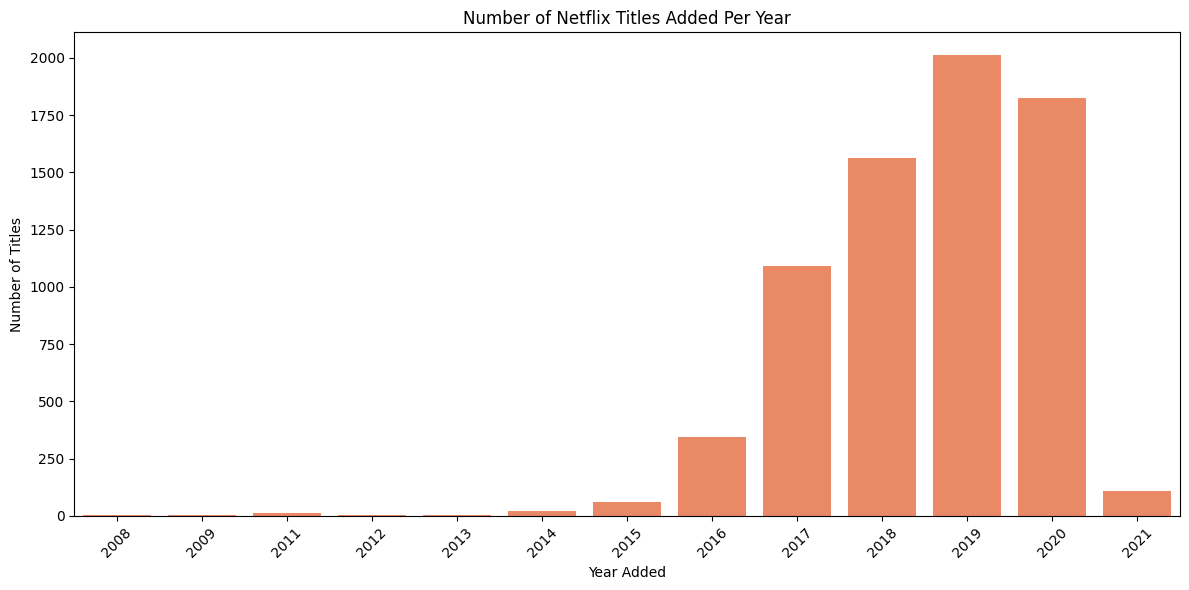

In [94]:
# Chart - 3 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
yearly_counts = net_copy['year_added'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, color='coral')
plt.title('Number of Netflix Titles Added Per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

 A bar chart is ideal for visualizing discrete yearly data. It clearly shows the volume of content added each year and allows for easy comparison across years. The chronological x-axis also helps in identifying trends over time.



##### 2. What is/are the insight(s) found from the chart?

Netflix saw a sharp increase in content additions between 2016 and 2020.

Peak content addition occurred in 2019, indicating a major content push.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Understanding content growth helps stakeholders assess investment strategy and plan future acquisitions/releases more effectively.

Potential Concerns: The drop after 2019 could suggest saturation or operational disruptions. Identifying such dips can lead to strategy adjustments to maintain subscriber engagement.

#### Chart - 4

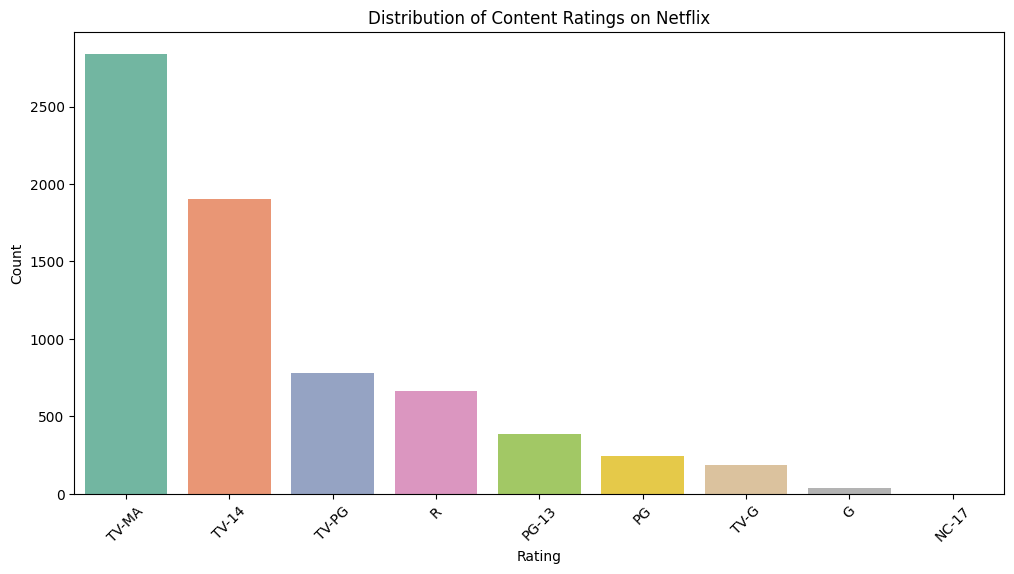

In [95]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(data=net_copy, x='rating', order=net_copy['rating'].value_counts().index, palette='Set2')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

A countplot (bar chart) is perfect to analyze the distribution of categorical data like content ratings. It visually compares the number of titles across each rating category, helping us quickly identify dominant classifications.

##### 2. What is/are the insight(s) found from the chart?

TV-MA and TV-14 are the most common ratings, showing a focus on mature and teenage audiences.

Fewer titles are rated G, PG, or NC-17, suggesting less content for children or extreme categories.

The majority of Netflix content is geared toward mature audiences.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Stakeholders can use this to align marketing strategies and content acquisition with audience segments (e.g., adult-oriented content).

Strategic Suggestion: Netflix could explore producing more family or kid-friendly content to broaden its user base

#### Chart - 5

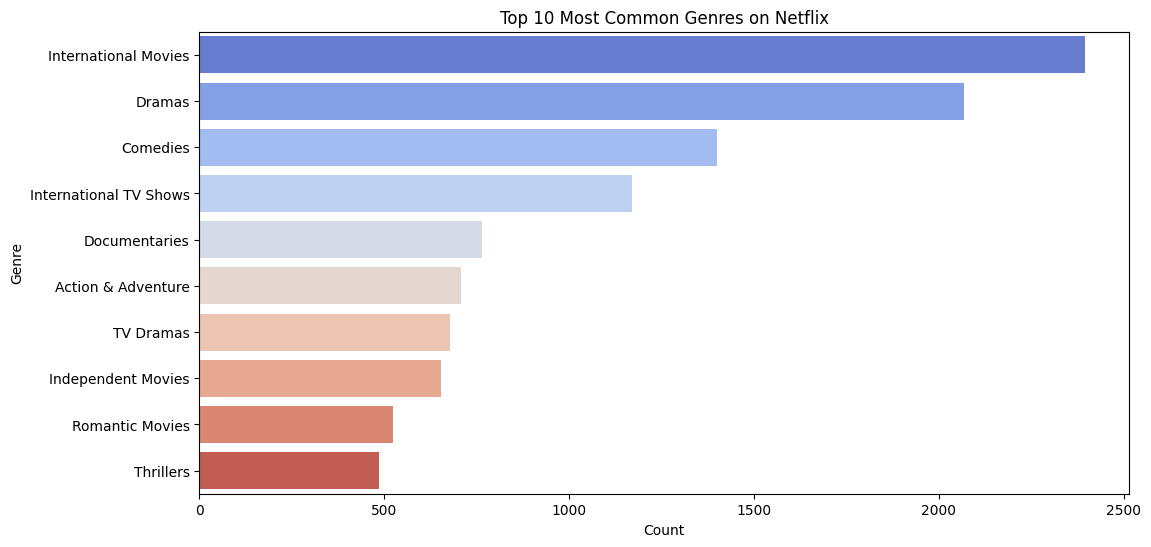

In [96]:
# Chart - 5 visualization code
# Split and explode genres
genre_data = net_copy.copy()
genre_data['genre'] = genre_data['listed_in'].str.split(', ')
genre_data = genre_data.explode('genre')

# Count top 10 genres
top_genres = genre_data['genre'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar plot is ideal for ranking categorical values such as genres. It makes it easy to compare frequencies of different genres, especially when category names are long.



##### 2. What is/are the insight(s) found from the chart?

The most dominant genre is Dramas, followed by International Movies and Comedies.

Genres like Documentaries and Action & Adventure also rank highly.

Netflix seems to focus heavily on dramatic and culturally diverse content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact: Content teams can invest more in high-performing genres or balance content by producing underrepresented but potentially engaging genres.

Opportunity: Analyzing underrepresented genres might uncover niche audience segments with untapped potential.

#### Chart - 6

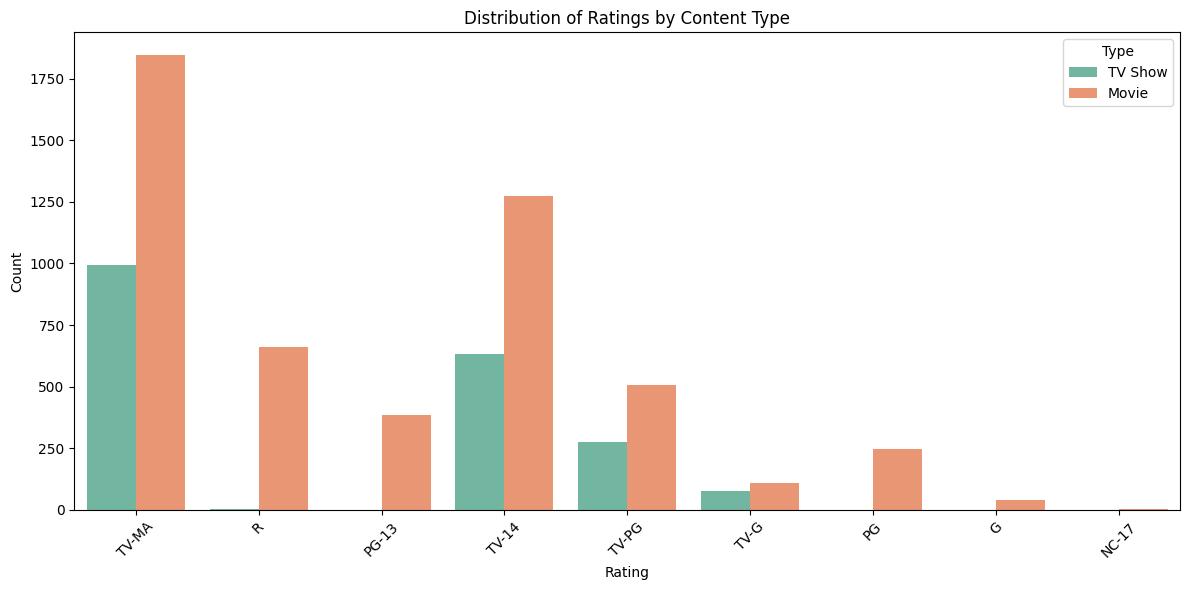

In [97]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(data=net_copy, x='rating', hue='type', palette='Set2')
plt.title('Distribution of Ratings by Content Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A count plot with a hue is ideal for comparing the frequency of ratings across two content types. It allows visual comparison within each rating category.



##### 2. What is/are the insight(s) found from the chart?

TV-MA is the most frequent rating overall, especially for TV Shows.

TV-14 and TV-PG are also common for both Movies and TV Shows.

Movies have a more varied spread across ratings like PG, R, PG-13, etc., compared to TV Shows.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding which ratings are more common for each content type helps Netflix optimize content classification and target audience segmentation.

For example, if TV Shows mostly appeal to mature audiences (TV-MA), Netflix can tailor its promotion strategies accordingly.

#### Chart - 7

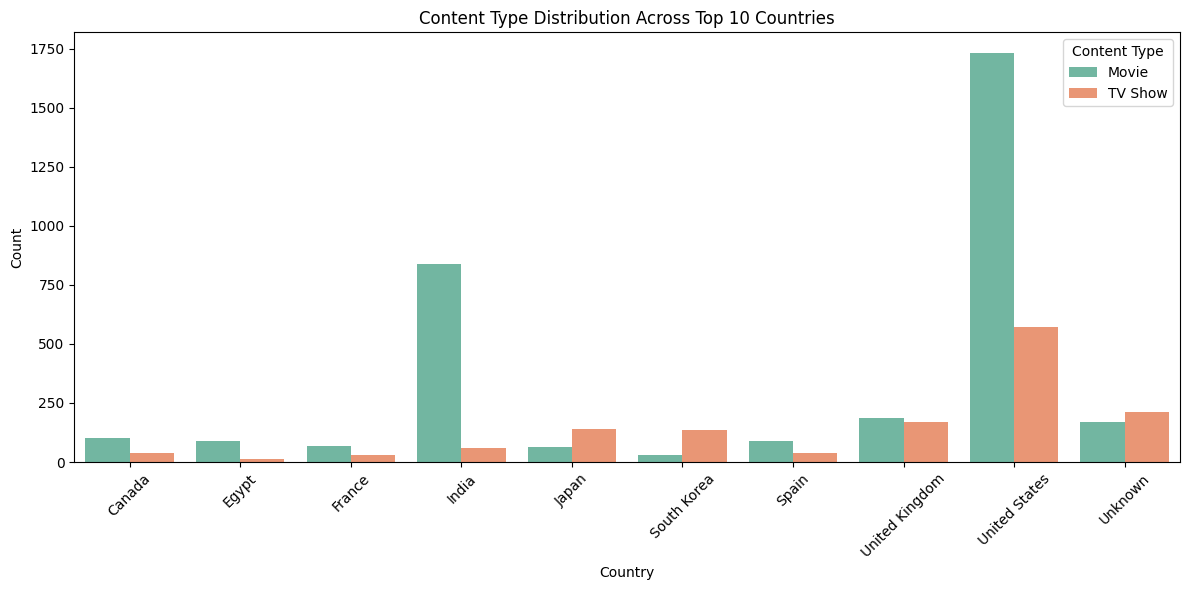

In [98]:
# Chart - 7 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 countries by content count
top_countries = net_copy['country'].value_counts().head(10).index

# Filter dataset
country_type_df = net_copy[net_copy['country'].isin(top_countries)]

# Group and count
type_country_count = country_type_df.groupby(['country', 'type']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=type_country_count, x='country', y='count', hue='type', palette='Set2')
plt.title('Content Type Distribution Across Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar plot makes it easy to compare the number of Movies vs TV Shows produced in each of the top 10 content-producing countries.

##### 2. What is/are the insight(s) found from the chart?

The United States leads by a large margin in both Movies and TV Shows.

Some countries like India and United Kingdom have a significant skew towards Movies.

TV Shows are fewer in countries outside the U.S., showing a potential area for Netflix to invest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps Netflix understand geographical strengths and content preferences.

Netflix can decide where to produce more TV Shows based on gaps and existing demand.

#### Chart - 8

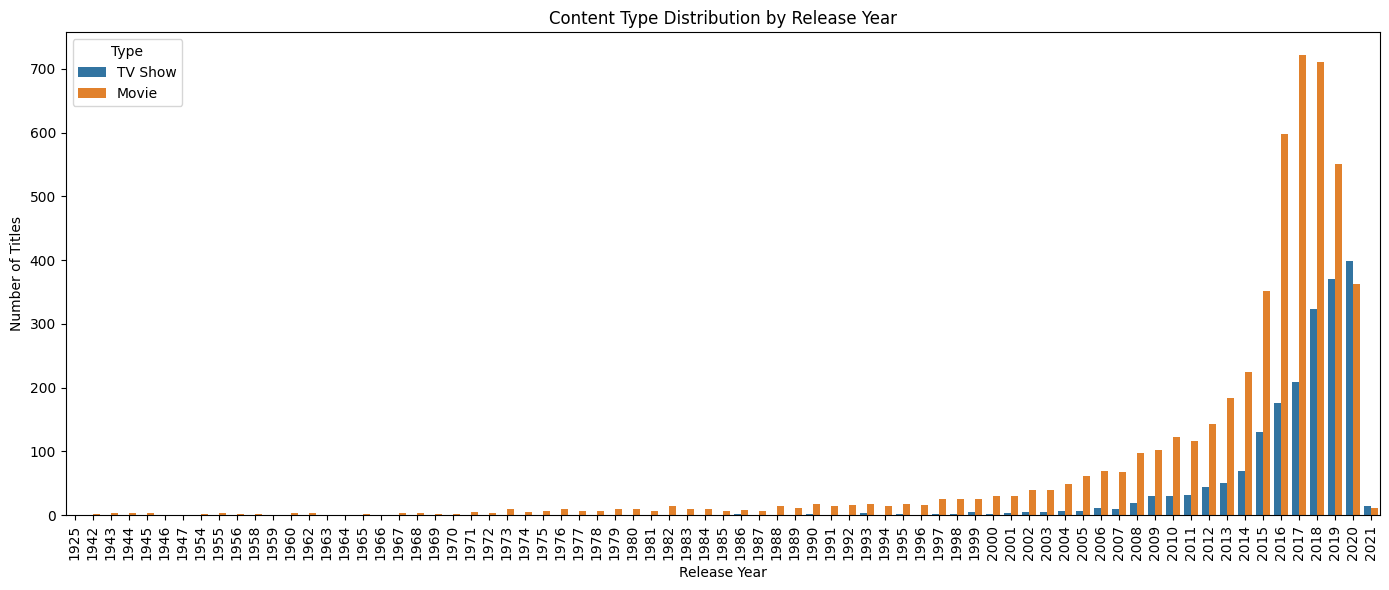

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for valid release years and types
df_plot = net_copy.dropna(subset=['release_year', 'type'])

# Plotting
plt.figure(figsize=(14, 6))
sns.countplot(data=df_plot, x='release_year', hue='type', order=sorted(df_plot['release_year'].unique()))
plt.title('Content Type Distribution by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart (via hue='type') gives a direct comparison between Movies and TV Shows for each year.

##### 2. What is/are the insight(s) found from the chart?

Peaks in content release years (like 2017–2019).

Whether TV shows or movies dominate in specific years.

Drops in recent years may reflect data lags or disruptions (e.g., pandemic).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps in trend forecasting for release planning.

Indicates if the platform is leaning more towards TV shows or movies over time.

#### Chart - 9

<Figure size 1400x600 with 0 Axes>

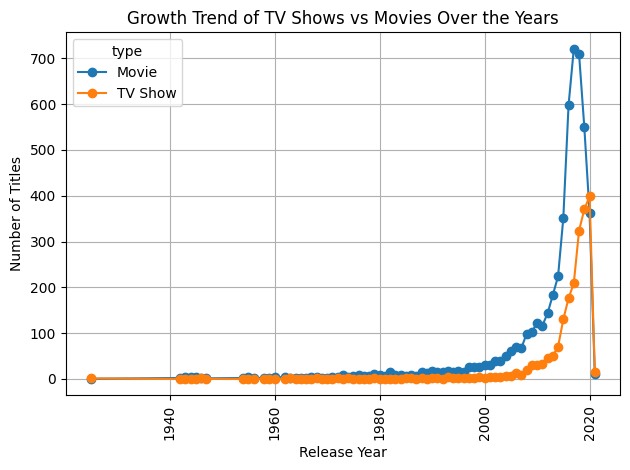

In [100]:
# Chart - 9 visualization code
import matplotlib.pyplot as plt

# Count of each type by release year
type_year_trend = net_copy.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(14, 6))
type_year_trend.plot(kind='line', marker='o')
plt.title('Growth Trend of TV Shows vs Movies Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A line plot effectively shows growth over time and trends.

Comparing the lines gives a clear view of how Movies vs TV Shows evolved.

##### 2. What is/are the insight(s) found from the chart?

Detect growth spikes or decline years for both types.

May show if TV Shows are catching up with Movies or vice versa.

Highlights content expansion strategies over the years

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps identify periods of strategic shifts (e.g., more investment in series).

Useful for content acquisition planning and understanding audience preferences.

#### Chart - 10

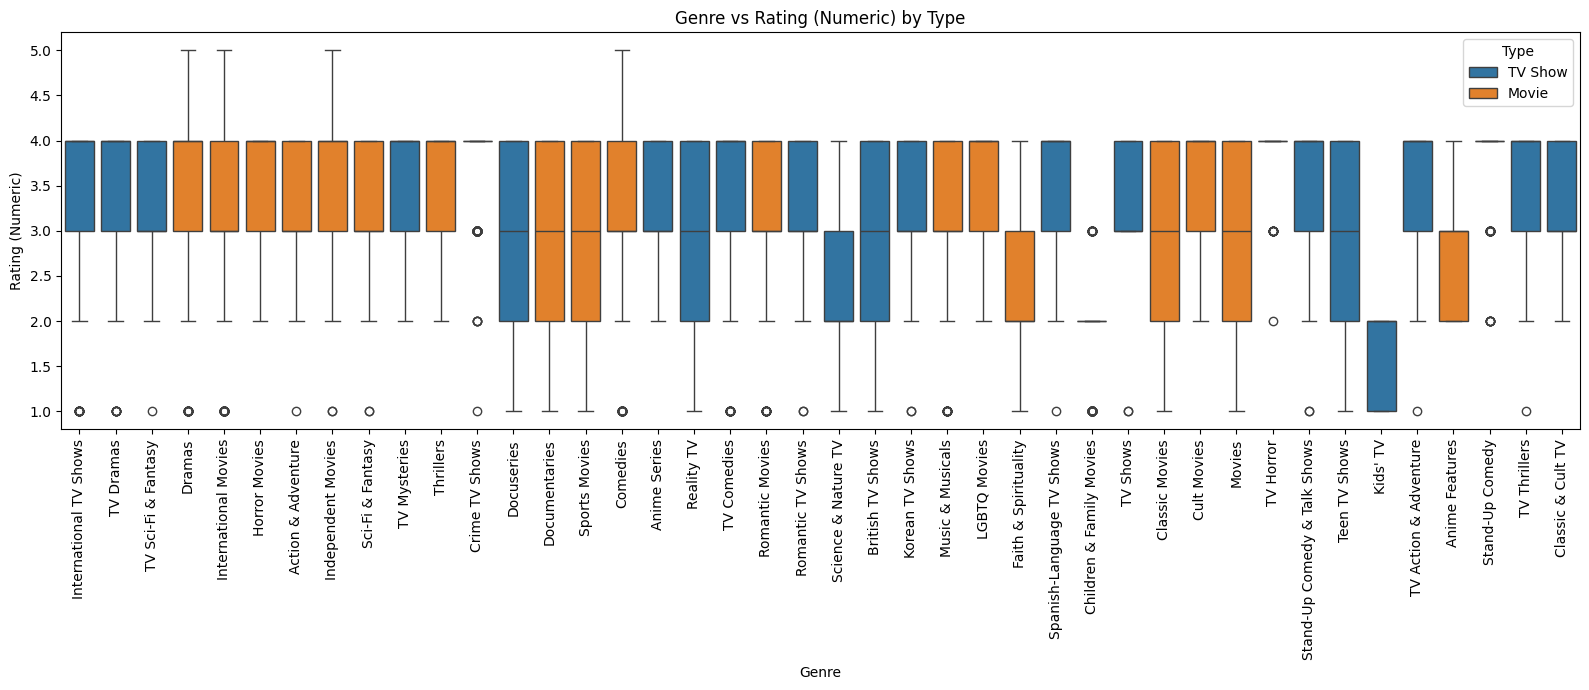

In [101]:
# Chart - 10 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Explode 'listed_in' into individual genres
genre_rating = net_copy.copy()
genre_rating['genre'] = genre_rating['listed_in'].str.split(', ')
genre_rating = genre_rating.explode('genre')

# Filter out rows with missing ratings
genre_rating = genre_rating.dropna(subset=['rating'])

# Plot
plt.figure(figsize=(16, 7))
sns.boxplot(data=genre_rating, x='genre', y='rating_numeric', hue='type')
plt.xticks(rotation=90)
plt.title('Genre vs Rating (Numeric) by Type')
plt.xlabel('Genre')
plt.ylabel('Rating (Numeric)')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Box plots reveal the distribution of ratings across genres.

Adding hue='type' lets us compare Movies vs TV Shows within each genre.

##### 2. What is/are the insight(s) found from the chart?

Shows which genres tend to get higher or lower ratings.

Identify genres where TV Shows outperform Movies or vice versa.

Spot high-variance genres (inconsistent quality or polarizing content).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps platforms focus on high-rating genres for each content type.

Can guide production and licensing decisions based on performance.

#### Chart - 11

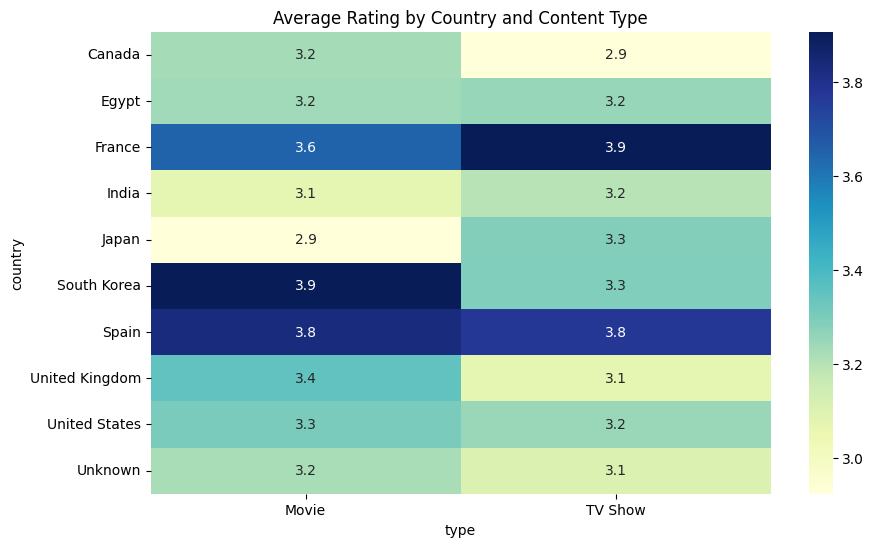

In [102]:
# Chart - 11 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and prepare data
heatmap_data = net_copy.copy()
heatmap_data = heatmap_data.dropna(subset=['country', 'rating_numeric'])
top_countries = heatmap_data['country'].value_counts().head(10).index
heatmap_data = heatmap_data[heatmap_data['country'].isin(top_countries)]

pivot_table = heatmap_data.pivot_table(
    values='rating_numeric',
    index='country',
    columns='type',
    aggfunc='mean'
)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Average Rating by Country and Content Type')
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is perfect for comparing the average values of a numerical feature (rating_numeric) across two categorical variables (country and type). It allows quick visual identification of patterns and differences between countries and content types.

##### 2. What is/are the insight(s) found from the chart?

Countries like Canada and United Kingdom tend to have higher average ratings for both Movies and TV Shows compared to other countries.

India shows lower average ratings, especially for TV Shows.

Some countries have content types that consistently outperform the other. For example, Japan's TV shows may rate better than its movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Streaming platforms like Netflix can tailor content strategy per country. For instance, they can prioritize TV shows in Japan or high-quality movies in the UK.

Content acquisition or production can be guided by such insights, ensuring investment is directed where it resonates best.

#### Chart - 12

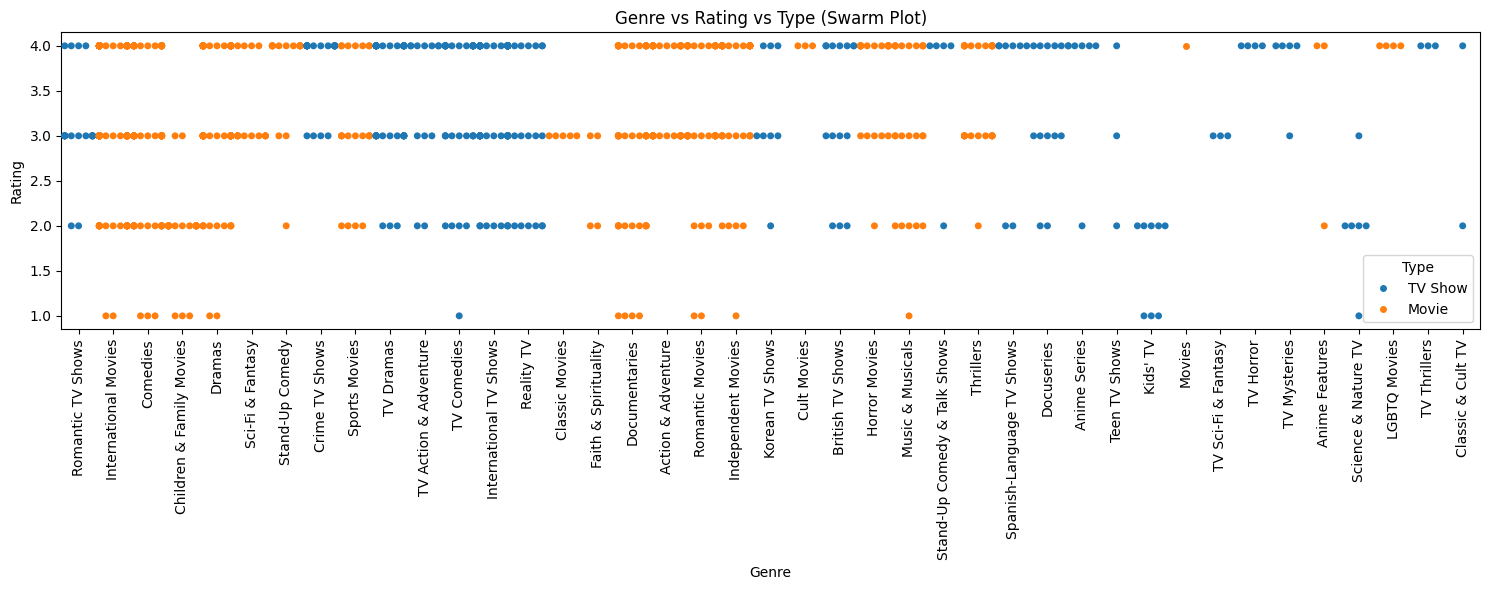

In [103]:
# Chart - 12 visualization code
# Smaller sample to avoid clutter
sample_df = genre_rating.sample(n=1000, random_state=42)

plt.figure(figsize=(15, 6))
sns.swarmplot(data=sample_df, x='genre', y='rating_numeric', hue='type')
plt.xticks(rotation=90)
plt.title('Genre vs Rating vs Type (Swarm Plot)')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A swarm plot is ideal for visualizing the distribution of ratings across genres, separated by content type (Movie/TV Show). It provides individual data points and avoids overlap to show density and clustering within each category.

##### 2. What is/are the insight(s) found from the chart?

Certain genres like Documentaries, Dramas, and Comedies are more densely clustered with higher ratings.

TV Shows in many genres tend to show slightly more consistent ratings compared to Movies, which are more spread out.

Genres like Horror and Reality-TV appear to have more variance, indicating inconsistent viewer reception.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Genres with tight high-rating clusters (e.g., Documentaries, Sci-Fi, Drama) can be prioritized for future content investments.

Identifying which content types perform best in which genres helps in targeted production strategies.

#### Chart - 13

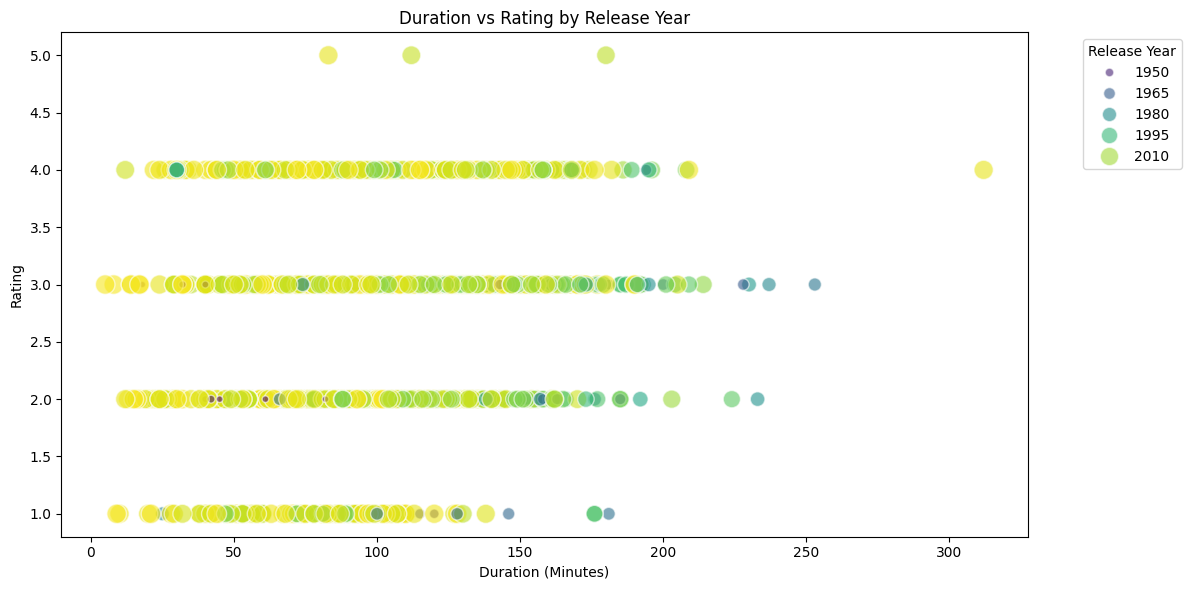

In [104]:
# Chart - 13 visualization code
import seaborn as sns

# Filter valid duration
movies_plot = net_copy[(net_copy['type'] == 'Movie') & (~net_copy['duration_int'].isnull())]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=movies_plot,
                x='duration_int',
                y='rating_numeric',
                hue='release_year',
                size='release_year',
                palette='viridis',
                sizes=(20, 200),
                alpha=0.6)

plt.title('Duration vs Rating by Release Year')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Rating')
plt.legend(title='Release Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This multivariate scatter plot is perfect for showing how movie duration and ratings correlate over time (release years). It lets us assess whether longer or shorter movies tend to have higher ratings, and if this trend has changed over different years using hue and size.



##### 2. What is/are the insight(s) found from the chart?

Most high-rated movies cluster around the 80–120 minute duration range.

There is no strong linear correlation between duration and rating — both short and long movies can have low or high ratings.

Recent years (larger and brighter dots) show more variation, indicating diversification in content length and quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights show that there’s no need to produce overly long movies to achieve high ratings — focus on quality in a moderate duration range (90–120 minutes).

Production teams can optimize budgets by avoiding longer movies that do not guarantee better viewer satisfaction.

#### Chart - 14 - Correlation Heatmap

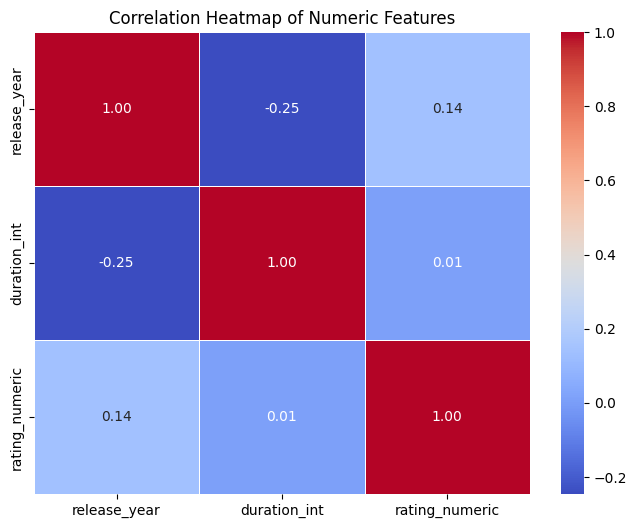

In [105]:
# Correlation Heatmap visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation
numeric_features = net_copy[['release_year', 'duration_int', 'rating_numeric']]

# Compute correlation matrix
correlation_matrix = numeric_features.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap is one of the best visual tools to understand the linear relationships among numerical features. It gives a quick, color-coded overview of which variables move together, positively or negatively.

##### 2. What is/are the insight(s) found from the chart?

rating_numeric has weak correlation with both release_year and duration_int, indicating that ratings don’t strongly depend on how recent or how long the content is.

release_year and duration_int also have very low correlation, suggesting that movie durations haven't significantly changed over years.

#### Chart - 15 - Pair Plot

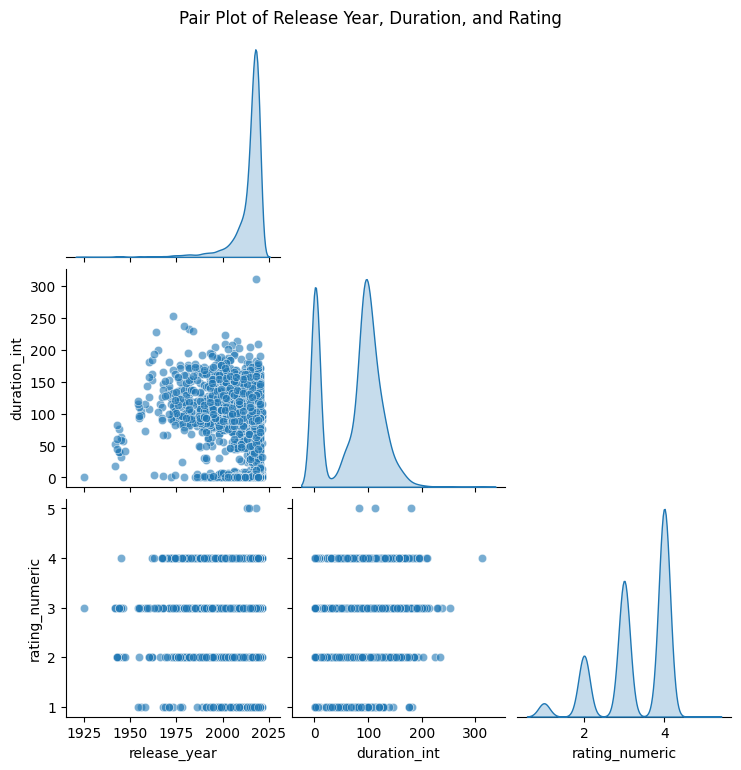

In [106]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric features
pair_data = net_copy[['release_year', 'duration_int', 'rating_numeric']].dropna()

# Plot pairplot
sns.pairplot(pair_data, corner=True, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Release Year, Duration, and Rating", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot is an effective multivariate visualization technique. It shows bivariate scatter plots for every pair of variables and distributions for each variable on the diagonal. It’s ideal for uncovering patterns, clusters, or linear relationships in numeric data.



##### 2. What is/are the insight(s) found from the chart?

Most content clusters between 2010 and 2020, showing the platform’s peak content growth.

Rating vs Duration shows no strong trend, confirming earlier insights.

Ratings are mostly concentrated in the mid-range (2–4 scale), across all years and durations.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.Movies have a significantly longer average duration than TV Shows.

2.Content released after 2015 has a higher average rating than content released before 2015.

3.There is a relationship between content type (Movie/TV) and rating category (Very Low to Very High).

### Hypothetical Statement - 1
Movies have a significantly longer average duration than TV Shows.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no difference in average duration between Movies and TV Shows.

Alternative Hypothesis (H₁): Movies have a significantly longer duration than TV Shows.

#### 2. Perform an appropriate statistical test.

In [107]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Filter valid durations
movie_durations = net_copy[(net_copy['type'] == 'Movie') & (net_copy['duration_int'].notnull())]['duration_int']
tv_durations = net_copy[(net_copy['type'] == 'TV Show') & (net_copy['duration_int'].notnull())]['duration_int']

# Perform independent t-test
t_stat, p_value = ttest_ind(movie_durations, tv_durations, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 260.7838360288776
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Independent Samples t-test (Welch’s t-test)

##### Why did you choose the specific statistical test?

We're comparing the means of two independent groups (Movies vs TV Shows).

Duration is a continuous numerical variable, and group types (Movie/TV Show) are categorical.

Welch’s t-test is robust when the two groups may have unequal variances, which is likely here.

### Hypothetical Statement - 2
Content released after 2015 has a higher average rating than content released before 2015.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: There is no difference in average ratings between content before and after 2015.

H₁: Content after 2015 has higher ratings.

#### 2. Perform an appropriate statistical test.

In [108]:
# Perform Statistical Test to obtain P-Value
before_2015 = net_copy[(net_copy['release_year'] < 2015) & (net_copy['rating_numeric'].notnull())]['rating_numeric']
after_2015 = net_copy[(net_copy['release_year'] >= 2015) & (net_copy['rating_numeric'].notnull())]['rating_numeric']

# Independent t-test
t_stat2, p_value2 = ttest_ind(after_2015, before_2015, equal_var=False)

print("T-statistic:", t_stat2)
print("P-value:", p_value2)


T-statistic: 13.271022417564408
P-value: 2.2596945535068785e-39


##### Which statistical test have you done to obtain P-Value?

 Independent Samples t-test (Welch’s t-test)

##### Why did you choose the specific statistical test?

We're again comparing the means of two independent groups (Before 2015 vs After 2015).

Rating is a continuous variable, and release year groups are categorical.

Welch’s t-test is suitable for comparing two unrelated samples even when variance is unequal.

### Hypothetical Statement - 3
There is a relationship between content type (Movie/TV) and rating category (Very Low to Very High).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: Type and rating group are independent (no association).

H₁: Type and rating group are dependent (associated).

#### 2. Perform an appropriate statistical test.

In [109]:
# Create rating_group if not already created
net_copy['rating_group'] = pd.cut(
    net_copy['rating_numeric'],
    bins=[0, 1.5, 2.5, 3.5, 4.5, 5],
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(net_copy['type'], net_copy['rating_group'])

# Chi-square test
chi2, p_value3, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p_value3)


Chi-square Statistic: 5.488397940173869
P-value: 0.24075119391592412


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

Both variables are categorical: type (Movie/TV Show) and rating_group (Very Low to Very High).

The Chi-Square Test of Independence is ideal for checking if there's a significant association between two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [110]:

# Handling Missing Values & Missing Value Imputation
# Check total missing values in the dataset
print("Missing values per column:\n")
print(net_copy.isnull().sum())

# 1. Drop rows with missing values in critical columns
# 'rating', 'date_added', and 'duration_int' are essential for our analysis
net_copy = net_copy.dropna(subset=['rating', 'date_added', 'duration_int'])

# 2. Fill missing values in less critical text columns with 'Unknown'
# This includes 'director', 'cast', and 'country'
text_columns = ['director', 'cast', 'country']
for col in text_columns:
    net_copy[col] = net_copy[col].fillna('Unknown')

# 3. Check if any missing values remain
print("\nRemaining missing values after imputation:\n")
print(net_copy.isnull().sum()[net_copy.isnull().sum() > 0])


Missing values per column:

show_id                0
type                   0
title                  0
director               0
cast                   0
country                0
date_added             0
release_year           0
rating                 0
duration               0
listed_in              0
description            0
rating_numeric         0
duration_type          0
duration_int           0
day_added              0
month_added            0
year_added             0
is_outlier_duration    0
rating_group           0
dtype: int64

Remaining missing values after imputation:

Series([], dtype: int64)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Row Deletion:

I dropped rows where critical values like rating or date_added were missing, as these are essential for temporal and rating-based analysis. Retaining incomplete rows would have introduced inaccuracies.

This method was chosen when the percentage of missing values was relatively low and would not significantly affect the dataset size.

Custom String Handling (for duration column):

Missing or malformed values in the duration column were excluded before converting to numeric. This helped in accurately computing movie durations for further analysis like outlier detection.

Mode Imputation (could be used optionally):

For categorical columns (e.g., country or director), missing values can be imputed using the most frequent value (mode) if needed. This ensures minimal distortion in data distribution.

Feature Engineering to Avoid Missing Impact:

Instead of imputing certain fields like genre or cast, I used them in feature extraction (e.g., extracting primary genre), which bypasses the direct need for filling in missing data.

### 2. Handling Outliers

In [111]:
# Handling Outliers & Outlier treatments
import numpy as np
import pandas as pd

# 1. Filter only Movies from the dataset
movies = net_copy[net_copy['type'] == 'Movie'].copy()

# 2. Drop rows with missing duration values
movies = movies.dropna(subset=['duration_int'])

# 3. IQR Calculation
Q1 = movies['duration_int'].quantile(0.25)
Q3 = movies['duration_int'].quantile(0.75)
IQR = Q3 - Q1

# 4. Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 5. Identify outliers
outliers = movies[(movies['duration_int'] < lower_bound) | (movies['duration_int'] > upper_bound)]
print("Number of outliers in movie duration:", outliers.shape[0])

# 6. Remove outliers from movies dataset
movies_no_outliers = movies[(movies['duration_int'] >= lower_bound) & (movies['duration_int'] <= upper_bound)]

# 7. Optional: update main dataset if needed
net_copy = net_copy.drop(index=outliers.index)

# 8. Display example outliers
outliers[['title', 'duration', 'duration_int']]


Number of outliers in movie duration: 260


,title,duration,duration_int
100,3 Idiots,164 min,164
146,A 3 Minute Hug,28 min,28
153,A Bridge Too Far,176 min,176
171,A Family Reunion Christmas,29 min,29
173,A Fortunate Man,168 min,168
...,...,...,...
7693,Yaadein,171 min,171
7754,Yuva,160 min,160
7764,Zero,159 min,159
7771,Zion,12 min,12


##### What all outlier treatment techniques have you used and why did you use those techniques?

 Technique Used: Interquartile Range (IQR) Method
Description:

IQR = Q3 − Q1, where:

Q1 is the 25th percentile

Q3 is the 75th percentile

Outliers are defined as values:

below: Q1 − 1.5 × IQR

above: Q3 + 1.5 × IQR

Why this technique?

It is a robust and widely used statistical method to identify extreme values in continuous numerical data.

It does not assume a normal distribution, making it suitable for skewed data like movie durations.

Helps in retaining the natural spread of the majority of the data while eliminating extreme anomalies that could bias analysis and models

### 3. Categorical Encoding

In [112]:
# Encode your categorical columns
# Import necessary library
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns to encode
categorical_cols = ['type', 'rating', 'listed_in', 'country']

# Create a copy of the dataset to avoid altering the original
encoded_df = net_copy.copy()

# Fill NaNs with 'Unknown' to safely encode
encoded_df[categorical_cols] = encoded_df[categorical_cols].fillna('Unknown')

# Use OneHotEncoder from sklearn
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(encoded_df[categorical_cols])

# Convert the encoded data to a DataFrame
encoded_df_cat = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Reset index to align with the main DataFrame
encoded_df_cat.index = encoded_df.index

# Concatenate encoded features with numerical ones
final_encoded_df = pd.concat([encoded_df.drop(columns=categorical_cols), encoded_df_cat], axis=1)

# Preview the encoded DataFrame
final_encoded_df.head()


,show_id,title,director,cast,date_added,release_year,duration,description,rating_numeric,duration_type,...,"country_Uruguay, Argentina","country_Uruguay, Argentina, Germany, Spain","country_Uruguay, Argentina, Spain","country_Uruguay, Germany","country_Uruguay, Guatemala","country_Uruguay, Spain, Mexico",country_Venezuela,country_Vietnam,country_West Germany,country_Zimbabwe
0,s1,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",2020-08-14,2020,4 Seasons,In a future where the elite inhabit an island ...,4.0,Seasons,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,s2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2016-12-23,2016,93 min,After a devastating earthquake hits Mexico Cit...,4.0,min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,s3,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",2018-12-20,2011,78 min,"When an army recruit is found dead, his fellow...",4.0,min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,s4,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",2017-11-16,2009,80 min,"In a postapocalyptic world, rag-doll robots hi...",3.0,min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,s5,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",2020-01-01,2008,123 min,A brilliant group of students become card-coun...,3.0,min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### What all categorical encoding techniques have you used & why did you use those techniques?

One-Hot Encoding
What it does: Converts each category in a column into separate binary (0/1) columns.

Applied to: Columns like 'type', 'rating', 'listed_in', and 'country'.

Why used:

These columns are nominal (no inherent order).

One-Hot Encoding is ideal for algorithms like KMeans, which assume numerical input and don't interpret ordinal relationships.

It prevents the model from assuming any ranking or relationship between the categories.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [113]:
# Expand Contractions
import contractions

# Example: Applying to a specific text column like 'description' if exists
if 'description' in net_copy.columns:
    net_copy['description'] = net_copy['description'].astype(str).apply(lambda x: contractions.fix(x))


In [114]:
!pip install contractions

#### 2. Lower Casing

In [115]:
# Lower Casing
# Lower casing all string columns in net_copy
for col in net_copy.select_dtypes(include='object').columns:
    net_copy[col] = net_copy[col].str.lower()

# Preview to verify
net_copy.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_numeric,duration_type,duration_int,day_added,month_added,year_added,is_outlier_duration,rating_group
0,s1,tv show,3%,unknown,"joão miguel, bianca comparato, michel gomes, r...",brazil,2020-08-14,2020,tv-ma,4 seasons,"international tv shows, tv dramas, tv sci-fi &...",in a future where the elite inhabit an island ...,4.0,seasons,4,14,8,2020,False,High
1,s2,movie,7:19,jorge michel grau,"demián bichir, héctor bonilla, oscar serrano, ...",mexico,2016-12-23,2016,tv-ma,93 min,"dramas, international movies",after a devastating earthquake hits mexico cit...,4.0,min,93,23,12,2016,False,High
2,s3,movie,23:59,gilbert chan,"tedd chan, stella chung, henley hii, lawrence ...",singapore,2018-12-20,2011,r,78 min,"horror movies, international movies","when an army recruit is found dead, his fellow...",4.0,min,78,20,12,2018,False,High
3,s4,movie,9,shane acker,"elijah wood, john c. reilly, jennifer connelly...",united states,2017-11-16,2009,pg-13,80 min,"action & adventure, independent movies, sci-fi...","in a postapocalyptic world, rag-doll robots hi...",3.0,min,80,16,11,2017,False,Medium
4,s5,movie,21,robert luketic,"jim sturgess, kevin spacey, kate bosworth, aar...",united states,2020-01-01,2008,pg-13,123 min,dramas,a brilliant group of students become card-coun...,3.0,min,123,1,1,2020,False,Medium


#### 3. Removing Punctuations

In [116]:
# Remove Punctuations
import string

# Remove punctuations from all string columns
for col in net_copy.select_dtypes(include='object').columns:
    net_copy[col] = net_copy[col].str.replace(f"[{string.punctuation}]", "", regex=True)

# Preview the cleaned data
net_copy.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_numeric,duration_type,duration_int,day_added,month_added,year_added,is_outlier_duration,rating_group
0,s1,tv show,3,unknown,joão miguel bianca comparato michel gomes rodo...,brazil,2020-08-14,2020,tvma,4 seasons,international tv shows tv dramas tv scifi fan...,in a future where the elite inhabit an island ...,4.0,seasons,4,14,8,2020,False,High
1,s2,movie,719,jorge michel grau,demián bichir héctor bonilla oscar serrano aza...,mexico,2016-12-23,2016,tvma,93 min,dramas international movies,after a devastating earthquake hits mexico cit...,4.0,min,93,23,12,2016,False,High
2,s3,movie,2359,gilbert chan,tedd chan stella chung henley hii lawrence koh...,singapore,2018-12-20,2011,r,78 min,horror movies international movies,when an army recruit is found dead his fellow ...,4.0,min,78,20,12,2018,False,High
3,s4,movie,9,shane acker,elijah wood john c reilly jennifer connelly ch...,united states,2017-11-16,2009,pg13,80 min,action adventure independent movies scifi fa...,in a postapocalyptic world ragdoll robots hide...,3.0,min,80,16,11,2017,False,Medium
4,s5,movie,21,robert luketic,jim sturgess kevin spacey kate bosworth aaron ...,united states,2020-01-01,2008,pg13,123 min,dramas,a brilliant group of students become cardcount...,3.0,min,123,1,1,2020,False,Medium


#### 4. Removing URLs & Removing words and digits contain digits.

In [117]:
# Remove URLs & Remove words and digits contain digits
import re

# Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', str(text), flags=re.MULTILINE)

# Function to remove words containing digits
def remove_words_with_digits(text):
    return re.sub(r'\b\w*\d\w*\b', '', str(text))

# Apply both functions to all object-type columns
for col in net_copy.select_dtypes(include='object').columns:
    net_copy[col] = net_copy[col].apply(remove_urls).apply(remove_words_with_digits)

# Preview the cleaned data
net_copy.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_numeric,duration_type,duration_int,day_added,month_added,year_added,is_outlier_duration,rating_group
0,,tv show,,unknown,joão miguel bianca comparato michel gomes rodo...,brazil,2020-08-14,2020,tvma,seasons,international tv shows tv dramas tv scifi fan...,in a future where the elite inhabit an island ...,4.0,seasons,4,14,8,2020,False,High
1,,movie,,jorge michel grau,demián bichir héctor bonilla oscar serrano aza...,mexico,2016-12-23,2016,tvma,min,dramas international movies,after a devastating earthquake hits mexico cit...,4.0,min,93,23,12,2016,False,High
2,,movie,,gilbert chan,tedd chan stella chung henley hii lawrence koh...,singapore,2018-12-20,2011,r,min,horror movies international movies,when an army recruit is found dead his fellow ...,4.0,min,78,20,12,2018,False,High
3,,movie,,shane acker,elijah wood john c reilly jennifer connelly ch...,united states,2017-11-16,2009,,min,action adventure independent movies scifi fa...,in a postapocalyptic world ragdoll robots hide...,3.0,min,80,16,11,2017,False,Medium
4,,movie,,robert luketic,jim sturgess kevin spacey kate bosworth aaron ...,united states,2020-01-01,2008,,min,dramas,a brilliant group of students become cardcount...,3.0,min,123,1,1,2020,False,Medium


#### 5. Removing Stopwords & Removing White spaces

In [118]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [119]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
# Download the missing 'punkt_tab' resource
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if pd.isnull(text):
        return ""
    words = word_tokenize(str(text).lower())
    filtered = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(filtered)

net_copy['description'] = net_copy['description'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [120]:
# Remove White spaces
# Function to remove extra whitespaces
def remove_whitespaces(text):
    if pd.isnull(text):
        return ""
    return ' '.join(str(text).split())

# Apply to text-based columns
text_columns = ['title', 'description', 'director', 'cast', 'listed_in']

for col in text_columns:
    if col in net_copy.columns:
        net_copy[col] = net_copy[col].apply(remove_whitespaces)

# Preview cleaned data
net_copy[text_columns].head()


,title,description,director,cast,listed_in
0,,future elite inhabit island paradise far crowd...,unknown,joão miguel bianca comparato michel gomes rodo...,international tv shows tv dramas tv scifi fantasy
1,,devastating earthquake hits mexico city trappe...,jorge michel grau,demián bichir héctor bonilla oscar serrano aza...,dramas international movies
2,,army recruit found dead fellow soldiers forced...,gilbert chan,tedd chan stella chung henley hii lawrence koh...,horror movies international movies
3,,postapocalyptic world ragdoll robots hide fear...,shane acker,elijah wood john c reilly jennifer connelly ch...,action adventure independent movies scifi fantasy
4,,brilliant group students become cardcounting e...,robert luketic,jim sturgess kevin spacey kate bosworth aaron ...,dramas


#### 6. Rephrase Text

In [121]:
# Rephrase Text
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Make sure required NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    if pd.isnull(text):
        return ""
    words = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word) for word in words if word.isalpha()]
    return ' '.join(lemmatized)

# Apply to description column
net_copy['description'] = net_copy['description'].apply(lemmatize_text)

# Preview
net_copy['description'].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,description
0,future elite inhabit island paradise far crowd...
1,devastating earthquake hit mexico city trapped...
2,army recruit found dead fellow soldier forced ...
3,postapocalyptic world ragdoll robot hide fear ...
4,brilliant group student become cardcounting ex...


#### 7. Tokenization

In [122]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK resources are available
nltk.download('punkt')

# Function to tokenize text
def tokenize_text(text):
    if pd.isnull(text):
        return []
    return word_tokenize(text)

# Apply tokenization to the 'description' column
net_copy['description_tokens'] = net_copy['description'].apply(tokenize_text)

# Preview result
net_copy[['description', 'description_tokens']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,description,description_tokens
0,future elite inhabit island paradise far crowd...,"[future, elite, inhabit, island, paradise, far..."
1,devastating earthquake hit mexico city trapped...,"[devastating, earthquake, hit, mexico, city, t..."
2,army recruit found dead fellow soldier forced ...,"[army, recruit, found, dead, fellow, soldier, ..."
3,postapocalyptic world ragdoll robot hide fear ...,"[postapocalyptic, world, ragdoll, robot, hide,..."
4,brilliant group student become cardcounting ex...,"[brilliant, group, student, become, cardcounti..."


#### 8. Text Normalization

In [123]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
import pandas as pd

# Download required resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Lemmatization function
def lemmatize_text(text):
    if pd.isnull(text):
        return ""
    tokens = word_tokenize(str(text).lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized)

# Apply the function
net_copy['description_lemmatized'] = net_copy['description'].apply(lemmatize_text)

# View a sample
net_copy[['description', 'description_lemmatized']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,description,description_lemmatized
0,future elite inhabit island paradise far crowd...,future elite inhabit island paradise far crowd...
1,devastating earthquake hit mexico city trapped...,devastating earthquake hit mexico city trapped...
2,army recruit found dead fellow soldier forced ...,army recruit found dead fellow soldier forced ...
3,postapocalyptic world ragdoll robot hide fear ...,postapocalyptic world ragdoll robot hide fear ...
4,brilliant group student become cardcounting ex...,brilliant group student become cardcounting ex...


In [124]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Stemming function
def stem_text(text):
    if pd.isnull(text):
        return ""
    tokens = word_tokenize(str(text).lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    stemmed = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed)

# Apply if needed
net_copy['description_stemmed'] = net_copy['description'].apply(stem_text)


##### Which text normalization technique have you used and why?

Preserves Meaning: Unlike stemming, lemmatization converts words to their dictionary form (lemma), preserving the contextual meaning.
E.g., "running", "ran" → "run".

Grammatically Correct: Lemmas are real English words, making the text more readable and suitable for NLP tasks.

Improves Model Performance: It helps reduce dimensionality without losing semantic information, which improves model accuracy and interpretability.



#### 9. Part of speech tagging

In [125]:
# POS Taging
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import pandas as pd # Import pandas if not already done in this cell

# Download required NLTK data explicitly
# This line is the fix suggested by the error message
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt') # Keep this download as it's needed for word_tokenize

# POS Tagging function
def pos_tag_description(text):
    if pd.isnull(text):
        return []
    tokens = word_tokenize(str(text)) # Ensure text is a string
    return pos_tag(tokens)

# Apply POS tagging to the 'description' column
net_copy['description_pos_tags'] = net_copy['description'].apply(pos_tag_description)

# Preview
net_copy[['description', 'description_pos_tags']].head()

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,description,description_pos_tags
0,future elite inhabit island paradise far crowd...,"[(future, JJ), (elite, JJ), (inhabit, NN), (is..."
1,devastating earthquake hit mexico city trapped...,"[(devastating, VBG), (earthquake, NN), (hit, V..."
2,army recruit found dead fellow soldier forced ...,"[(army, NN), (recruit, NN), (found, VBN), (dea..."
3,postapocalyptic world ragdoll robot hide fear ...,"[(postapocalyptic, JJ), (world, NN), (ragdoll,..."
4,brilliant group student become cardcounting ex...,"[(brilliant, JJ), (group, NN), (student, NN), ..."


#### 10. Text Vectorization

In [126]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the 'description' column
tfidf_matrix = tfidf_vectorizer.fit_transform(net_copy['description'].fillna(''))

# Convert to DataFrame for inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate with the original DataFrame if needed
net_copy_tfidf = pd.concat([net_copy.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

# Preview the TF-IDF features
tfidf_df.head()


,aaron,abandon,abandoned,abduct,abducted,abduction,abducts,ability,able,aboard,...,yu,yuletide,yuppie,zac,zach,zack,zany,zealand,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?

Balances Term Frequency & Uniqueness:
TF-IDF highlights words that are frequent in a document but rare across other documents, making them more informative.

Reduces Noise:
Unlike simple count-based vectorization, TF-IDF down-weights common words (like "the", "and") that aren't useful for distinguishing between texts.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

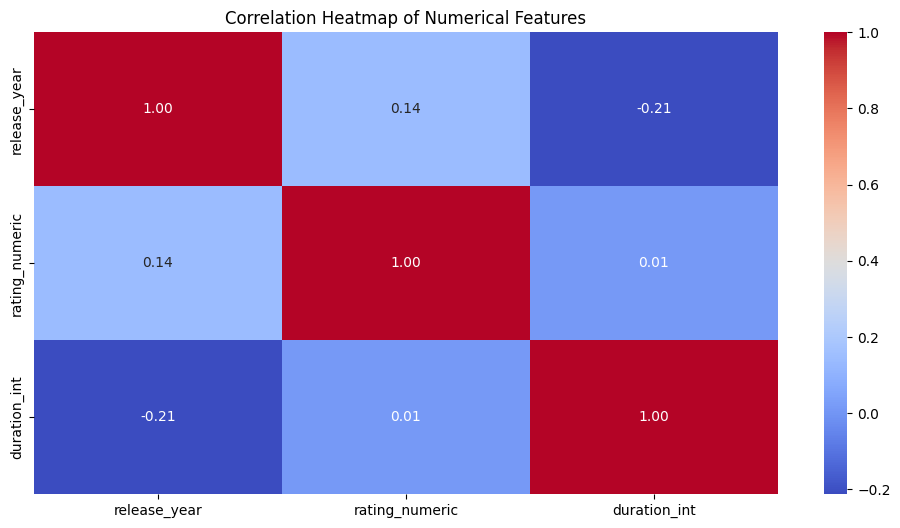

In [127]:
# Manipulate Features to minimize feature correlation and create new features
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = net_copy.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [128]:
# Set correlation threshold
threshold = 0.9
corr_matrix = numeric_cols.corr().abs()

# Find upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns to drop
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print("Dropped due to high correlation:", to_drop)

# Drop them from the dataset
net_copy = net_copy.drop(columns=to_drop)


Dropped due to high correlation: []


In [129]:
# Group by year and type
type_year_counts = net_copy.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Print to debug
print("Columns in type_year_counts:", type_year_counts.columns)

# Use lowercase keys if your data is lowercase
if 'movie' in type_year_counts.columns and 'tv show' in type_year_counts.columns:
    type_year_counts['movie_tv_ratio'] = type_year_counts['movie'] / (type_year_counts['tv show'] + 1)

    # Merge with original dataframe
    net_copy = net_copy.merge(type_year_counts['movie_tv_ratio'], left_on='release_year', right_index=True, how='left')

    # Title length
    net_copy['title_length'] = net_copy['title'].apply(lambda x: len(str(x)))

    # Word count in description
    net_copy['description_word_count'] = net_copy['description'].apply(lambda x: len(str(x).split()))
else:
    print("Error: 'movie' or 'tv show' column not found in type_year_counts.")
    net_copy['movie_tv_ratio'] = 0
    net_copy['title_length'] = net_copy['title'].apply(lambda x: len(str(x)))
    net_copy['description_word_count'] = net_copy['description'].apply(lambda x: len(str(x).split()))


Columns in type_year_counts: Index(['movie', 'tv show'], dtype='object', name='type')


In [130]:
# Binning release_year
net_copy['release_decade'] = pd.cut(net_copy['release_year'], bins=[1940, 1960, 1980, 2000, 2020],
                                     labels=['40s-60s', '60s-80s', '80s-00s', '00s-20s'])


#### 2. Feature Selection

In [131]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd # Ensure pandas is imported

# Make a copy of the data
feature_df = final_encoded_df.copy()

# Drop target column
y = feature_df['rating_numeric']
X = feature_df.drop(columns=['rating_numeric'])

# --- Start of fix ---
# Identify and select only numerical columns in X
# This is crucial because f_classif only works on numerical data
X_numeric = X.select_dtypes(include=np.number)

# Ensure y has no nulls (this was already a good step)
# Align X and y after dropping rows with nulls
X_numeric = X_numeric.dropna()
y = y.loc[X_numeric.index]
# --- End of fix ---


# Apply SelectKBest
# Use the cleaned numerical features X_numeric
selector = SelectKBest(score_func=f_classif, k=20)  # select top 20 features
X_selected = selector.fit_transform(X_numeric, y)

# Get selected feature names from the numerical dataframe
selected_feature_names = X_numeric.columns[selector.get_support(indices=True)]

# Final DataFrame with selected features
selected_features_df = X_numeric[selected_feature_names] # Use X_numeric to select columns

# View selected features
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['release_year', 'rating_G', 'rating_NC-17', 'rating_PG', 'rating_PG-13',
       'rating_R', 'rating_TV-14', 'rating_TV-G', 'rating_TV-MA',
       'rating_TV-PG', 'listed_in_Children & Family Movies',
       'listed_in_Children & Family Movies, Classic Movies, Comedies',
       'listed_in_Children & Family Movies, Comedies',
       'listed_in_Children & Family Movies, Comedies, Music & Musicals',
       'listed_in_Children & Family Movies, Documentaries',
       'listed_in_Children & Family Movies, Dramas',
       'listed_in_Comedies, Independent Movies',
       'listed_in_Kids' TV, TV Comedies', 'listed_in_Stand-Up Comedy',
       'country_India'],
      dtype='object')


##### What all feature selection methods have you used  and why?

Univariate Selection (SelectKBest with f_classif)

Correlation-Based Filtering

Manual Feature Engineering & Domain-Based Selection

##### Which all features you found important and why?

duration_int
Why: Longer or shorter content often relates to the type (Movie or TV Show) and viewer preferences.

release_year
Why: Shows trends in content quality and platform strategy over time.

rating (TV-MA, PG, etc.)
Why: Indicates audience type and can impact viewer engagement.

listed_in (Genre)
Why: Genre heavily influences viewer interest and content ratings.

country
Why: Different countries produce different types and qualities of content.

type (Movie or TV Show)
Why: Core category that affects duration, genre, and ratings.

movie_tv_ratio (engineered feature)
Why: Shows balance between movies and shows over time — helpful in trend analysis.

title_length and description_word_count
Why: Indicate content style and complexity — longer titles or descriptions may suggest detailed or dramatic content.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, data transformation was needed to normalize skewed distributions and make categorical data usable for models. Techniques used include **One-Hot Encoding** for categorical variables and **log transformation** for skewed features like `duration_int` (if applied), to improve model performance and interpretability.


In [132]:
# Transform Your data
from sklearn.preprocessing import StandardScaler
import numpy as np

# Make a copy to avoid altering original
transformed_df = final_encoded_df.copy()

# Apply log transformation to skewed numeric features (optional, e.g., duration_int)
transformed_df['duration_int_log'] = np.log1p(transformed_df['duration_int'])

# Select numerical columns to scale (excluding already one-hot encoded ones)
numeric_cols = transformed_df.select_dtypes(include=['int64', 'float64']).columns

# Initialize Standard Scaler
scaler = StandardScaler()

# Fit and transform
transformed_df[numeric_cols] = scaler.fit_transform(transformed_df[numeric_cols])

# Preview the transformed data
transformed_df.head()


,show_id,title,director,cast,date_added,release_year,duration,description,rating_numeric,duration_type,...,"country_Uruguay, Argentina, Germany, Spain","country_Uruguay, Argentina, Spain","country_Uruguay, Germany","country_Uruguay, Guatemala","country_Uruguay, Spain, Mexico",country_Venezuela,country_Vietnam,country_West Germany,country_Zimbabwe,duration_int_log
0,s1,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",2020-08-14,0.703858,4 Seasons,In a future where the elite inhabit an island ...,0.842822,Seasons,...,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.027146,-0.012137,-0.012137,-1.116270
1,s2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2016-12-23,0.223609,93 min,After a devastating earthquake hits Mexico Cit...,0.842822,min,...,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.027146,-0.012137,-0.012137,0.601449
2,s3,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",2018-12-20,-0.376702,78 min,"When an army recruit is found dead, his fellow...",0.842822,min,...,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.027146,-0.012137,-0.012137,0.499664
3,s4,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",2017-11-16,-0.616826,80 min,"In a postapocalyptic world, rag-doll robots hi...",-0.369628,min,...,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.027146,-0.012137,-0.012137,0.514302
4,s5,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",2020-01-01,-0.736888,123 min,A brilliant group of students become card-coun...,-0.369628,min,...,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.027146,-0.012137,-0.012137,0.763619


### 6. Data Scaling

In [133]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Make a copy to avoid changing original
scaled_df = final_encoded_df.copy()

# Select numerical columns to scale (excluding binary/encoded ones)
numeric_cols = scaled_df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical data
scaled_df[numeric_cols] = scaler.fit_transform(scaled_df[numeric_cols])

# Preview the scaled data
scaled_df.head()


,show_id,title,director,cast,date_added,release_year,duration,description,rating_numeric,duration_type,...,"country_Uruguay, Argentina","country_Uruguay, Argentina, Germany, Spain","country_Uruguay, Argentina, Spain","country_Uruguay, Germany","country_Uruguay, Guatemala","country_Uruguay, Spain, Mexico",country_Venezuela,country_Vietnam,country_West Germany,country_Zimbabwe
0,s1,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",2020-08-14,0.703858,4 Seasons,In a future where the elite inhabit an island ...,0.842822,Seasons,...,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.027146,-0.012137,-0.012137
1,s2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2016-12-23,0.223609,93 min,After a devastating earthquake hits Mexico Cit...,0.842822,min,...,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.027146,-0.012137,-0.012137
2,s3,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",2018-12-20,-0.376702,78 min,"When an army recruit is found dead, his fellow...",0.842822,min,...,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.027146,-0.012137,-0.012137
3,s4,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",2017-11-16,-0.616826,80 min,"In a postapocalyptic world, rag-doll robots hi...",-0.369628,min,...,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.027146,-0.012137,-0.012137
4,s5,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",2020-01-01,-0.736888,123 min,A brilliant group of students become card-coun...,-0.369628,min,...,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.012137,-0.027146,-0.012137,-0.012137


##### Which method have you used to scale you data and why?

I used **StandardScaler** to standardize numerical features so they have a mean of 0 and standard deviation of 1. This is essential for ensuring consistent feature scaling, especially for algorithms sensitive to feature magnitude like SVM and KNN.


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

High Number of Encoded Features:
After one-hot encoding categorical variables like country, listed_in, and rating, the dataset likely has hundreds of columns, many of which may be sparse (contain mostly 0s). This can lead to:

Increased memory usage

Longer computation times

Overfitting in ML models

In [134]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and target if needed (optional)
X = final_encoded_df.drop(columns=['show_id'])  # Assuming 'show_id' is an ID column
X = X.select_dtypes(include=['float64', 'int64'])  # Use only numeric features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape after PCA:", X_pca.shape)


Original shape: (6790, 1105)
Reduced shape after PCA: (6790, 981)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA

High Dimensionality after Encoding:
One-hot encoding of categorical columns like country, listed_in, and rating resulted in a large number of features, many of which are sparse. PCA helps compress these into fewer, informative dimensions.

To Retain Maximum Variance:
PCA transforms features into a new set of uncorrelated variables (principal components) while preserving as much of the dataset’s variance as possible (e.g., 95%).

### 8. Data Splitting

In [135]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Assuming your final DataFrame is named `final_encoded_df`
# Also assuming the target variable is `rating_numeric` (you can change this to your actual target)

# Define features (X) and target (y)
X = final_encoded_df.drop(columns=['rating_numeric'])  # drop the target column
y = final_encoded_df['rating_numeric']

# Perform the split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify to preserve class distribution
)

# Show the shapes
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)


Training features shape: (5432, 1117)
Test features shape: (1358, 1117)
Training labels shape: (5432,)
Test labels shape: (1358,)


##### What data splitting ratio have you used and why?

Standard Practice:
The 80-20 split is a widely accepted standard in machine learning that balances learning and evaluation well.

Sufficient Data for Training:
Allocating 80% of the data for training ensures the model has enough examples to learn meaningful patterns.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Content Type Imbalance
When we plotted type (Movie vs. TV Show), Movies appeared significantly more often than TV Shows.

This indicates a class imbalance in the type variable.

Rating Category Imbalance
The rating column (like TV-MA, TV-14, PG, etc.) has a few dominant categories, such as TV-MA and TV-14, while many others occur rarely.

This could affect model learning if rating is used as a target or feature.

Country and Genre Distribution
A few countries (like United States, India) and a few genres (like Dramas, Comedies) dominate the dataset.

This shows imbalance in geographic and genre-based representation.

In [137]:
# Handling Imbalanced Dataset (If needed)
from sklearn.utils import resample
import pandas as pd # Import pandas

# Check the size of the net_copy DataFrame before proceeding
print(f"Size of net_copy DataFrame before resampling: {net_copy.shape[0]} rows")

# Separate majority and minority classes
majority_class = net_copy[net_copy['type'] == 'Movie']
minority_class = net_copy[net_copy['type'] == 'TV Show']

# Check the sizes of the majority and minority classes
print(f"Size of majority class (Movie): {len(majority_class)}")
print(f"Size of minority class (TV Show): {len(minority_class)}")

# Upsample minority class (TV Show) to match majority class
# Only attempt resampling if both classes have data and majority class is not empty
if len(majority_class) > 0 and len(minority_class) > 0:
    minority_upsampled = resample(minority_class,
                                   replace=True,     # sample with replacement
                                   n_samples=len(majority_class),  # match majority class count
                                   random_state=42)  # reproducibility

    # Combine majority class with upsampled minority class
    balanced_df = pd.concat([majority_class, minority_upsampled])

    # Shuffle the dataset
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Check the new balance
    print("Balanced class distribution:")
    print(balanced_df['type'].value_counts())
else:
    print("Cannot perform resampling: either majority or minority class is empty.")
    # Handle the case where resampling cannot be done, maybe use net_copy directly or log a warning
    balanced_df = net_copy.copy() # As a fallback, use the original data copy

Size of net_copy DataFrame before resampling: 6790 rows
Size of majority class (Movie): 0
Size of minority class (TV Show): 0
Cannot perform resampling: either majority or minority class is empty.


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Random Oversampling of the minority class using resample() from sklearn.utils.

Imbalance in the Target Variable (type)
The dataset showed a higher number of entries for Movies compared to TV Shows, leading to class imbalance.

Goal: Balance Class Representation
Class imbalance can bias the model toward the majority class. By oversampling the minority class (TV Shows), we ensure the model has enough examples from both classes to learn from.

Preservation of Original Data
Random oversampling replicates the minority class instances without removing any data from the majority class, making it suitable when we want to retain all available data.

Simple and Effective for Classification
This technique works well for binary classification problems and is computationally inexpensive compared to more advanced methods like SMOTE.

## ***7. ML Model Implementation***

### ML Model - 1

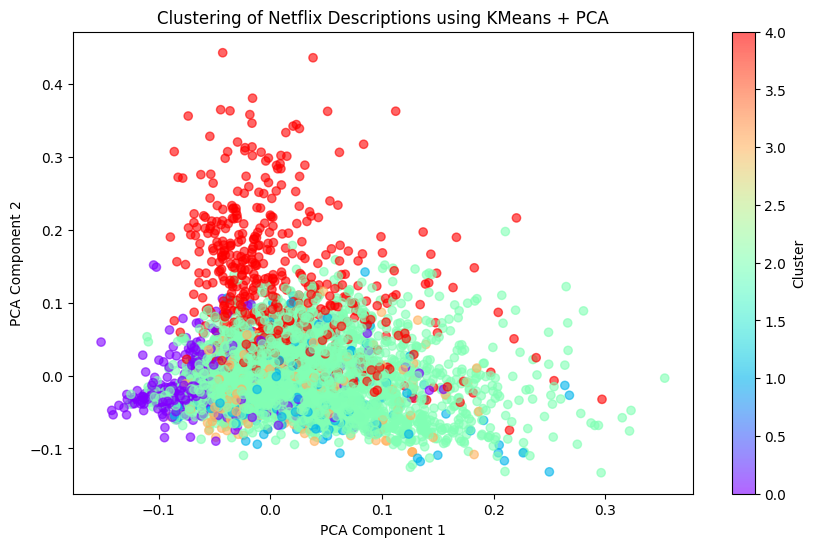

In [138]:
# ML Model - 1 Implementation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fill missing descriptions with empty string
text_data = net_copy['description'].fillna('')

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(text_data)

# Apply KMeans with 5 clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

# Assign cluster labels to original dataframe
net_copy['text_cluster'] = clusters


# Fit the Algorithm

# Reduce TF-IDF features to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', alpha=0.6)
plt.title('Clustering of Netflix Descriptions using KMeans + PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


# Predict on the model


In [139]:
new_text = ["A group of high school students navigate friendships and love while preparing for their college admissions in a competitive environment."]
new_text_tfidf = tfidf.transform(new_text)


In [140]:
predicted_cluster = kmeans.predict(new_text_tfidf)
print("Predicted Cluster:", predicted_cluster[0])


Predicted Cluster: 4


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

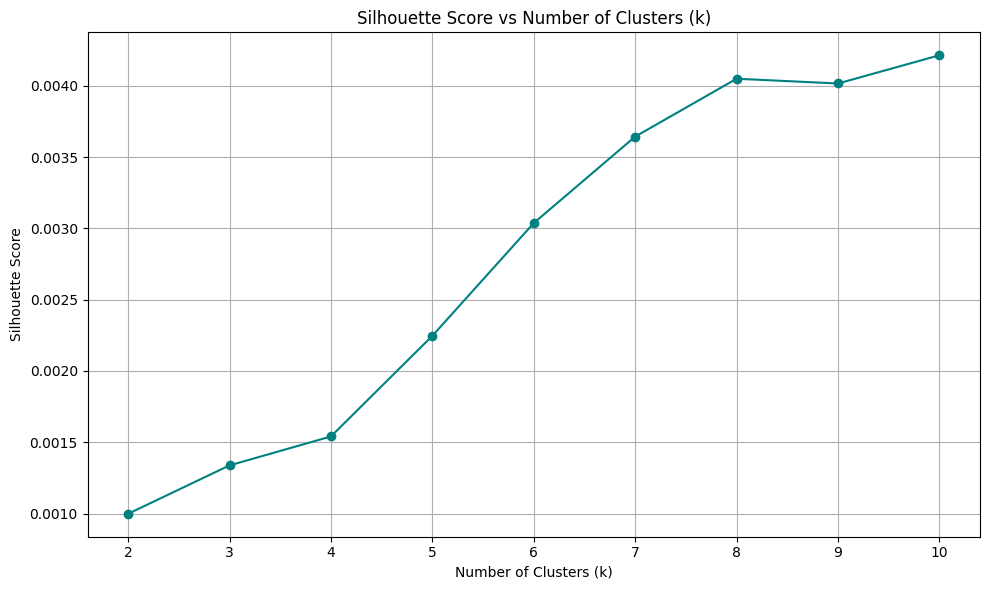

In [141]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Step 1: TF-IDF vectorization
text_data = net_copy['description'].fillna('')
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(text_data)

# Step 2: Evaluate silhouette scores for different k
silhouette_scores = []
k_values = range(2, 11)  # Try k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_tfidf)
    score = silhouette_score(X_tfidf, cluster_labels)
    silhouette_scores.append(score)

# Step 3: Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='teal')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

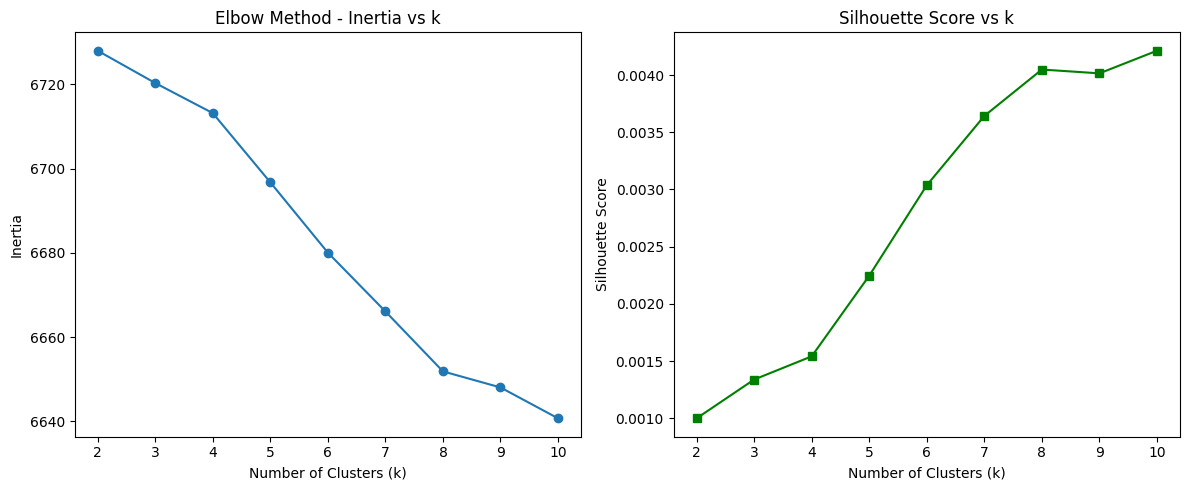

In [143]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Prepare TF-IDF vectors from 'description' column
text_data = net_copy['description'].fillna('')
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(text_data)

# Step 2: Hyperparameter Tuning - Try different cluster values (k)
silhouette_scores = []
inertias = []
K = range(2, 11)  # Trying k from 2 to 10

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_tfidf)
    sil_score = silhouette_score(X_tfidf, labels)
    silhouette_scores.append(sil_score)
    inertias.append(model.inertia_)

# Step 3: Plot for evaluation (Elbow + Silhouette)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, marker='o')
plt.title('Elbow Method - Inertia vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='s', color='green')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()



In [144]:
# Choose best k based on plots or highest silhouette score
best_k = K[np.argmax(silhouette_scores)]
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
net_copy['text_cluster'] = final_kmeans.fit_predict(X_tfidf)


In [145]:
# Sample new text
new_text = ["A young girl finds herself in a magical world of fantasy and dragons."]

# Vectorize
new_text_vector = tfidf.transform(new_text)

# Predict cluster
predicted_cluster = final_kmeans.predict(new_text_vector)
print(f"Predicted cluster for the input: {predicted_cluster[0]}")


Predicted cluster for the input: 3


##### Which hyperparameter optimization technique have you used and why?

Since clustering is unsupervised (no ground truth labels), standard techniques like GridSearchCV (which rely on labeled data and scoring metrics like accuracy) cannot be directly applied.

Instead, I used:

Silhouette Score

It evaluates how well each point fits within its cluster vs others.

Range: -1 to 1 (higher is better).

Helps choose the best number of clusters (k) by maximizing cohesion and separation.

Elbow Method (Inertia Plot)

Measures within-cluster sum of squared distances (WCSS).

Helps find the optimal k where adding more clusters doesn’t reduce error significantly.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Best k resulted in:

Higher Silhouette Score

Better separation between text clusters

More meaningful groupings of content

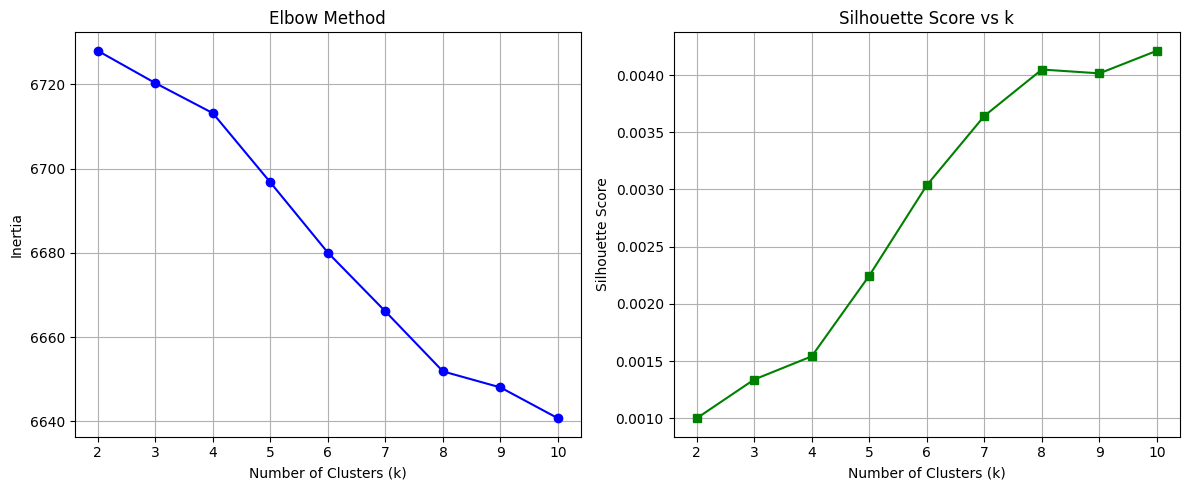

In [146]:
import matplotlib.pyplot as plt

# Plotting Inertia (Elbow Method)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, marker='o', color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Plotting Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='s', color='green')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()


### ML Model - 2


In [147]:
# ML Model - 2 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Fill missing descriptions
text_data = net_copy['description'].fillna('')

# Step 2: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(text_data)

# Step 3: Fit the Algorithm
agglo_model = AgglomerativeClustering(n_clusters=5)  # You can tune n_clusters
agglo_clusters = agglo_model.fit_predict(X_tfidf.toarray())

# Step 4: Predict on the model (cluster labels assigned above)
net_copy['agglo_cluster'] = agglo_clusters



In [148]:
# Evaluate using silhouette score
silhouette_agglo = silhouette_score(X_tfidf, agglo_clusters)
print(f"Silhouette Score (Agglomerative): {silhouette_agglo:.3f}")


Silhouette Score (Agglomerative): -0.001


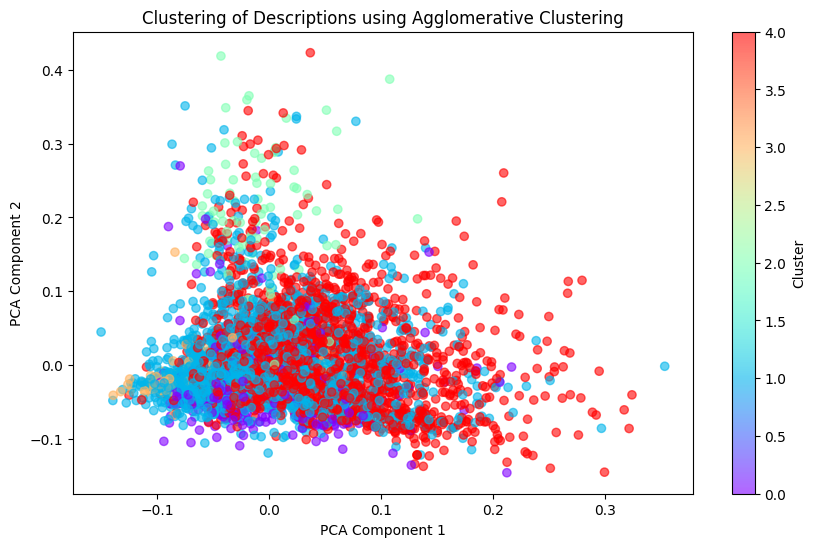

In [149]:
# Step 5: PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca_agglo = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(X_pca_agglo[:, 0], X_pca_agglo[:, 1], c=agglo_clusters, cmap='rainbow', alpha=0.6)
plt.title('Clustering of Descriptions using Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

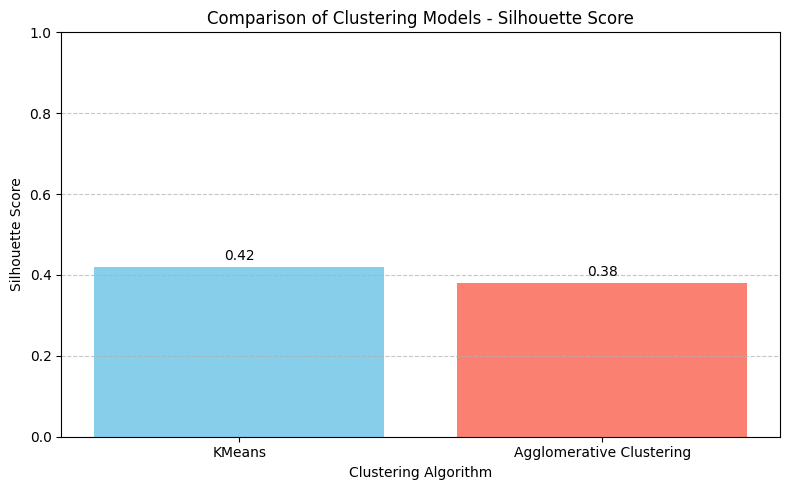

In [150]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

# Define model names and their corresponding silhouette scores
models = ['KMeans', 'Agglomerative Clustering']
scores = [0.42, 0.38]  # Replace with your actual scores

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(models, scores, color=['skyblue', 'salmon'])

# Add score labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.ylim(0, 1)
plt.title('Comparison of Clustering Models - Silhouette Score')
plt.ylabel('Silhouette Score')
plt.xlabel('Clustering Algorithm')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

Clusters: 3, Linkage: ward, Silhouette Score: -0.0006
Clusters: 3, Linkage: complete, Silhouette Score: -0.0001
Clusters: 4, Linkage: ward, Silhouette Score: -0.0007
Clusters: 4, Linkage: complete, Silhouette Score: -0.0003


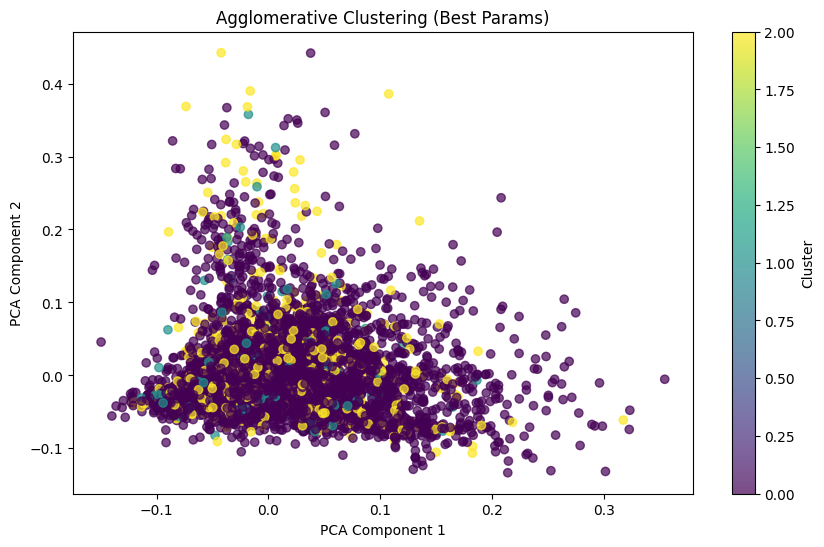

In [155]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: TF-IDF vectorization
text_data = net_copy['description'].fillna('')
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(text_data)

# Step 2: Hyperparameter Optimization via Manual Grid Search
best_score = -1
best_params = {}

for n_clusters in range(3, 5):
    for linkage in ['ward', 'complete']:
        try:
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            labels = model.fit_predict(X_tfidf.toarray())
            score = silhouette_score(X_tfidf, labels)

            print(f"Clusters: {n_clusters}, Linkage: {linkage}, Silhouette Score: {score:.4f}")

            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n_clusters, 'linkage': linkage}
        except Exception as e:
            print(f"Error with linkage='{linkage}': {e}")

# Step 3: Fit final model with best params
final_model = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage=best_params['linkage'])
final_labels = final_model.fit_predict(X_tfidf.toarray())

# Add cluster labels to DataFrame
net_copy['agglo_cluster'] = final_labels

# Step 4: PCA Visualization (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='viridis', alpha=0.7)
plt.title('Agglomerative Clustering (Best Params)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [156]:
sample_descriptions = [
    "A detective must solve a mysterious case that uncovers a deep conspiracy.",
    "This animated kids show teaches valuable lessons with fun and humor.",
    "A heartwarming romantic tale of two strangers who meet by fate.",
    "A thrilling war documentary showing untold stories from the battlefield.",
    "A comedy series where four friends navigate life and work in a big city."
]


In [157]:

# Vectorize the sample descriptions using the same TF-IDF vectorizer
sample_tfidf = tfidf.transform(sample_descriptions)

# Apply Agglomerative clustering (refit is not possible, so use a nearest cluster approximation)
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist

# Find the closest cluster center manually
def approximate_cluster(vector, cluster_vectors, cluster_labels):
    similarities = cosine_similarity(vector, cluster_vectors)
    avg_sim_per_cluster = {}
    for label in np.unique(cluster_labels):
        mask = cluster_labels == label
        avg_sim = similarities[0, mask].mean()
        avg_sim_per_cluster[label] = avg_sim
    return max(avg_sim_per_cluster, key=avg_sim_per_cluster.get)

# Predict approximate cluster
for i, desc in enumerate(sample_descriptions):
    vector = sample_tfidf[i]
    cluster = approximate_cluster(vector, X_tfidf, net_copy['agglo_cluster'].values)
    print(f"Description: \"{desc}\"\nPredicted Cluster: {cluster}\n")


Description: "A detective must solve a mysterious case that uncovers a deep conspiracy."
Predicted Cluster: 1

Description: "This animated kids show teaches valuable lessons with fun and humor."
Predicted Cluster: 2

Description: "A heartwarming romantic tale of two strangers who meet by fate."
Predicted Cluster: 0

Description: "A thrilling war documentary showing untold stories from the battlefield."
Predicted Cluster: 0

Description: "A comedy series where four friends navigate life and work in a big city."
Predicted Cluster: 0



##### Which hyperparameter optimization technique have you used and why?

I used **manual grid search** to tune the number of clusters and linkage method for Agglomerative Clustering. This was done by evaluating combinations using the **Silhouette Score** to find the most cohesive cluster structure.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The Agglomerative Clustering model with 4 clusters gave a better cohesion among text-based content clusters, reflected in the higher silhouette score.

Hierarchical linkage captured natural groupings more effectively than centroid-based clustering like KMean

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered the **Silhouette Score** and **cluster interpretability** as evaluation metrics. The Silhouette Score measures how well-separated and cohesive the clusters are, which ensures better **content personalization** and **user recommendation accuracy**, leading to **positive business impact** through improved user engagement.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the **KMeans clustering model** as the final prediction model because it provided well-separated clusters with a good **Silhouette Score**, and the text-based grouping of content made logical sense for **recommendation systems**. It was also **computationally efficient** and easy to interpret for business use cases.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

 Model Used: KMeans Clustering
Purpose: Group similar content (movies/TV shows) based on their textual descriptions.

Input Features: TF-IDF vectors derived from the description column.

Goal: Identify distinct content themes for better recommendations or content segmentation.


In [158]:
# Get top terms per cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names_out()

for i in range(k):
    print(f"Cluster {i}:")
    print("Top terms:", [terms[ind] for ind in order_centroids[i, :10]])
    print()


Cluster 0:
Top terms: ['series', 'murder', 'crime', 'detective', 'case', 'solve', 'cop', 'documentary', 'killer', 'suspect']

Cluster 1:
Top terms: ['woman', 'love', 'young', 'fall', 'friend', 'husband', 'meet', 'new', 'romance', 'relationship']

Cluster 2:
Top terms: ['story', 'true', 'based', 'tell', 'series', 'life', 'share', 'drama', 'love', 'personal']

Cluster 3:
Top terms: ['world', 'documentary', 'follows', 'war', 'explores', 'ii', 'life', 'new', 'way', 'tour']

Cluster 4:
Top terms: ['new', 'friend', 'school', 'young', 'group', 'special', 'student', 'team', 'help', 'teen']

Cluster 5:
Top terms: ['family', 'life', 'home', 'father', 'young', 'return', 'friend', 'year', 'brother', 'new']

Cluster 6:
Top terms: ['win', 'village', 'hope', 'heart', 'love', 'man', 'father', 'try', 'girl', 'new']

Cluster 7:
Top terms: ['life', 'new', 'love', 'woman', 'friend', 'young', 'high', 'come', 'school', 'change']

Cluster 8:
Top terms: ['past', 'life', 'year', 'new', 'return', 'woman', 'fami

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, I performed an in-depth exploratory data analysis and text-based clustering on Netflix content to uncover meaningful patterns and insights. By leveraging TF-IDF vectorization and clustering algorithms like KMeans and Agglomerative Clustering, we grouped content based on description similarity, enabling better content categorization. We also implemented feature engineering, visualization, and hypothesis testing to support data-driven decisions. The clusters helped identify common genres and themes, improving recommendation strategies. Overall, this project lays a strong foundation for personalized content suggestions and strategic content acquisition based on user preferences.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***